In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #ez hogy a rákban nem a defaultja a jupyternek?

In [21]:
DATA_LOCATION = "db/ep_cosponsorship_dataset.csv"
# we put `keep_default_na` here so that nan-s get parsed in the way we want
ENTIRE_DATASET = pd.read_csv(DATA_LOCATION, header = 0, keep_default_na = False)

In [44]:
def createNxGraph():
    # we use MEPName instead of OfficialMEPID
    G = nx.from_pandas_edgelist(ENTIRE_DATASET, source='AmendmentID', target='MEPName')
    return G

In [45]:
def listMEPs():
    # we use MEPName instead of OfficialMEPID
    o = pd.unique(ENTIRE_DATASET['MEPName'])
    #print(type(o)) #DEBUG
    return o

In [84]:
def getMEPDataFromID(identifier): #slow :(
    x = ENTIRE_DATASET.loc[ENTIRE_DATASET['OfficialMEPID'] == identifier]
    x = x.iloc[0]
    x = x.drop(['AmendmentID',
                          'Committee',
                          'Dossier',
                          'PENumber',
                          'DocumentType',
                          'Date'])
    return dict(x)

def getMEPData(column, value): #slow :(
    x = ENTIRE_DATASET.loc[ENTIRE_DATASET[column] == value]
    x = x.iloc[0]
    x = x.drop(['AmendmentID',
                          'Committee',
                          'Dossier',
                          'PENumber',
                          'DocumentType',
                          'Date'])
    return dict(x)
    

In [85]:
getMEPDataFromID("124704")

{'OfficialMEPID': '124704',
 'MEPName': 'Stanislav POLČÁK',
 'MemberState': 'Czechia',
 'EPGroup': 'EPP',
 'NationalParty': 'Mayors and Independents'}

In [48]:
print(createNxGraph())

Graph with 259357 nodes and 750578 edges


In [66]:
# Here's all the MEPs we have data for
listMEPs()

array(['Stanislav POLČÁK', 'Anna ZALEWSKA', 'Catherine GRISET',
       'Bas EICKHOUT', 'Martin HOJSÍK', 'Eric ANDRIEU', 'Pascal CANFIN',
       'Adina-Ioana VĂLEAN', 'César LUENA',
       'Cristina MAESTRE MARTÍN DE ALMAGRO', 'Javi LÓPEZ',
       'Nicolás GONZÁLEZ CASARES', 'Ivan Vilibor SINČIĆ',
       'Joanna KOPCIŃSKA', 'Maria SPYRAKI', 'Véronique TRILLET-LENOIR',
       'Maria da Graça CARVALHO', 'Carlo FIDANZA', 'Maria GRAPINI',
       'John HOWARTH', 'Jiří POSPÍŠIL', 'Eugen JURZYCA', 'Adam BIELAN',
       'Beata MAZUREK', 'Evžen TOŠENOVSKÝ', 'Pascal ARIMONT',
       'Dita CHARANZOVÁ', 'Svenja HAHN', 'Alexandra GEESE',
       'Markus BUCHHEIT', 'Olivier CHASTEL', 'Anna BONFRISCO',
       'Valentino GRANT', 'Hélène LAPORTE', 'Isabella ADINOLFI',
       'Annalisa TARDINO', 'Marco ZANNI', 'Joachim KUHS',
       'Matteo ADINOLFI', 'Irène TOLLERET', 'Jérémy DECERLE',
       'Elsi KATAINEN', 'Benoît BITEAU', 'Ulrike MÜLLER',
       'Atidzhe ALIEVA-VELI', 'Clara AGUILERA', 'Ivan DAVID',


In [50]:
myGraph = createNxGraph()
list_meps = listMEPs()

In [51]:
print(f"Some information about this graph:\n"
        f"Number of nodes: {nx.number_of_nodes(myGraph)}\n"
        f"Number of edges: {nx.number_of_edges(myGraph)}\n")

print(f"The nodes in this graph include: {list(myGraph.nodes)[:100]}")

# now amendments are 'int's and MEPS are 'string's.

Some information about this graph:
Number of nodes: 259357
Number of edges: 750578

The nodes in this graph include: [892323, 'Stanislav POLČÁK', 880086, 'Anna ZALEWSKA', 885326, 'Catherine GRISET', 891589, 'Bas EICKHOUT', 881777, 'Martin HOJSÍK', 888406, 'Eric ANDRIEU', 890457, 'Pascal CANFIN', 894926, 893171, 892450, 894881, 893914, 893108, 'Adina-Ioana VĂLEAN', 894291, 883936, 'César LUENA', 'Cristina MAESTRE MARTÍN DE ALMAGRO', 'Javi LÓPEZ', 'Nicolás GONZÁLEZ CASARES', 889291, 885412, 884461, 879904, 890644, 879857, 'Ivan Vilibor SINČIĆ', 885362, 891635, 'Joanna KOPCIŃSKA', 880857, 'Maria SPYRAKI', 888150, 'Véronique TRILLET-LENOIR', 886342, 887149, 888086, 'Maria da Graça CARVALHO', 893879, 'Carlo FIDANZA', 893221, 'Maria GRAPINI', 887654, 'John HOWARTH', 894783, 'Jiří POSPÍŠIL', 881778, 884421, 893372, 'Eugen JURZYCA', 'Adam BIELAN', 'Beata MAZUREK', 'Evžen TOŠENOVSKÝ', 893286, 884484, 880531, 886091, 885447, 888054, 881629, 886288, 'Pascal ARIMONT', 882597, 884341, 891348, 87985

In [52]:
nx.is_bipartite(myGraph)

True

In [53]:
# most már lefut elég gyorsan !
mep_social_network = nx.algorithms.bipartite.projected_graph(myGraph, list_meps)

In [54]:
print(mep_social_network.nodes())
print(len(mep_social_network.nodes()))

['Stanislav POLČÁK', 'Anna ZALEWSKA', 'Catherine GRISET', 'Bas EICKHOUT', 'Martin HOJSÍK', 'Eric ANDRIEU', 'Pascal CANFIN', 'Adina-Ioana VĂLEAN', 'César LUENA', 'Cristina MAESTRE MARTÍN DE ALMAGRO', 'Javi LÓPEZ', 'Nicolás GONZÁLEZ CASARES', 'Ivan Vilibor SINČIĆ', 'Joanna KOPCIŃSKA', 'Maria SPYRAKI', 'Véronique TRILLET-LENOIR', 'Maria da Graça CARVALHO', 'Carlo FIDANZA', 'Maria GRAPINI', 'John HOWARTH', 'Jiří POSPÍŠIL', 'Eugen JURZYCA', 'Adam BIELAN', 'Beata MAZUREK', 'Evžen TOŠENOVSKÝ', 'Pascal ARIMONT', 'Dita CHARANZOVÁ', 'Svenja HAHN', 'Alexandra GEESE', 'Markus BUCHHEIT', 'Olivier CHASTEL', 'Anna BONFRISCO', 'Valentino GRANT', 'Hélène LAPORTE', 'Isabella ADINOLFI', 'Annalisa TARDINO', 'Marco ZANNI', 'Joachim KUHS', 'Matteo ADINOLFI', 'Irène TOLLERET', 'Jérémy DECERLE', 'Elsi KATAINEN', 'Benoît BITEAU', 'Ulrike MÜLLER', 'Atidzhe ALIEVA-VELI', 'Clara AGUILERA', 'Ivan DAVID', 'Gilles LEBRETON', 'Maxette PIRBAKAS', 'Angelo CIOCCA', 'Mara BIZZOTTO', 'Juan Ignacio ZOIDO ÁLVAREZ', 'Daniel 

Szóval, van egy 754 csúcsú gráfunk a social networkről, most már minden csúcs az MEP-k NEVÉVEL van címkézve. Így egy kicsit át kell írogatni valszeg algoritmusokat, de alapvetően mostly ugyanaz marad a buli.

In [55]:
deg_hist = nx.degree_histogram(myGraph)
deg_hist


[0,
 134299,
 32769,
 20866,
 16829,
 13583,
 9798,
 8115,
 5789,
 4525,
 3260,
 2349,
 1982,
 1370,
 780,
 829,
 461,
 359,
 182,
 130,
 85,
 52,
 71,
 55,
 84,
 5,
 4,
 0,
 7,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 1

In [56]:
degs = dict(myGraph.degree())

sorted_nodes = sorted(degs.items(), key=lambda x: x[1], reverse=True)
sorted_nodes[:10]

[('Olivier CHASTEL', 5155),
 ('Lina GÁLVEZ MUÑOZ', 4483),
 ('Marc ANGEL', 4350),
 ('Maria-Manuel LEITÃO-MARQUES', 4245),
 ('Maria GRAPINI', 4200),
 ('Nicolae ŞTEFĂNUȚĂ', 3914),
 ('Milan BRGLEZ', 3650),
 ('Ramona STRUGARIU', 3544),
 ('Manuel PIZARRO', 3533),
 ('Dragoș PÎSLARU', 3491)]

Akkor I guess ezek a legaktívabb EP képviselők. Jár nekik a keksz.

Itt megnézzük hogy ők kik és miért.

In [67]:
for i in sorted_nodes[:10]:
    print(getMEPData("MEPName", i[0]))

{'AmendmentID': 889480, 'Committee': 'BUDG', 'Dossier': '2019/2036 (BUD)', 'Date': '25/07/2019', 'PENumber': 'PE639.911v01-00', 'DocumentType': 'DraftReport', 'OfficialMEPID': '197463', 'MEPName': 'Olivier CHASTEL', 'MemberState': 'Belgium', 'EPGroup': 'RE', 'NationalParty': 'Reformist Movement'}
{'AmendmentID': 895786, 'Committee': 'EMPL', 'Dossier': '2019/0000 (INI)', 'Date': '16/09/2019', 'PENumber': 'PE639.999v02-00', 'DocumentType': 'DraftReport', 'OfficialMEPID': '197702', 'MEPName': 'Lina GÁLVEZ MUÑOZ', 'MemberState': 'Spain', 'EPGroup': 'S&D', 'NationalParty': "Spanish Socialist Workers' Party"}
{'AmendmentID': 892689, 'Committee': 'ECON', 'Dossier': '2019/2211 (INI)', 'Date': '27/01/2020', 'PENumber': 'PE646.869v01-00', 'DocumentType': 'DraftReport', 'OfficialMEPID': '202073', 'MEPName': 'Marc ANGEL', 'MemberState': 'Luxembourg', 'EPGroup': 'S&D', 'NationalParty': "Luxembourg Socialist Worker's Party"}
{'AmendmentID': 880351, 'Committee': 'IMCO', 'Dossier': '2019/0101 (COD)', 

Ami talán érezhető ezekből az adatokból, hogy a top 10 aktív MEP-nek a csoportja mind RE vagy S&D. A tagállamok közül Románia képviselteti magát nagyon erősen.

A következő fokszám gyakoriság ábrán csak a 0 és 20 kozotti ertekek látszodnak rendesen (bár amik nem egy számjegyű a gyakoriságuk azon fokszámok kb 1 és 25 közt vannak)

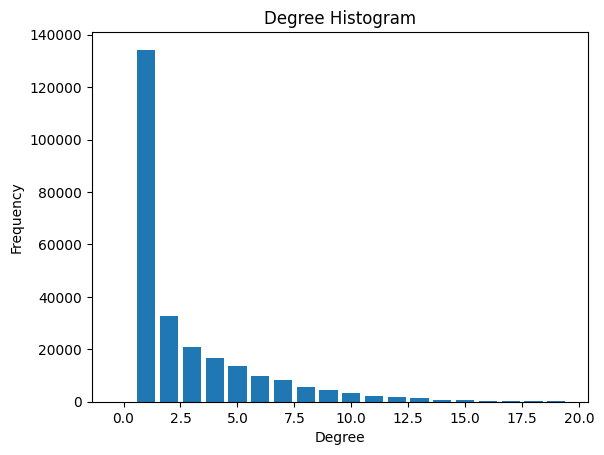

In [13]:
plt.bar(list(x for x in range(len(deg_hist[:20]))), deg_hist[:20], align='center')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

Esetleg latvanyosabb ha azt mondjuk hogy kizárjuk az 1 fokszámot, merthogy az csak 1 ember javaslata/ 1 db javaslat (A többi 25 - nél nagyobb fokszám pedig nagyjából mind 0,1,2,3 gyakoriságú)

^- Ez nem igazán így van. A degree-k itt azt jelentik, hogy egy adott MEP hány emberrel kollaborált.

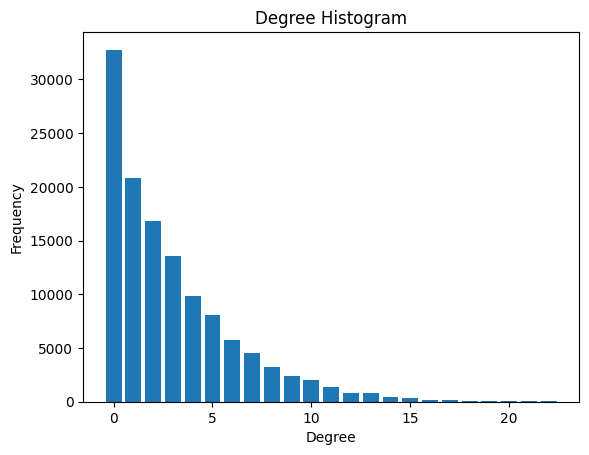

In [14]:
plt.bar(list(x for x in range(len(deg_hist[2:25]))), deg_hist[2:25], align='center')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [61]:
### melyik ország politikusai csináltak többet?

# ez sajna elég lassú mert a "getMEPData" függvényt használja...
# valszeg lehetne okosabban, direktben a pandas-t használva valahogy

contribs_by_country = {}

for node in mep_social_network:
    curr_country = getMEPData("MEPName", node)["MemberState"]
    if curr_country not in contribs_by_country:
        contribs_by_country[curr_country] = 0
    contribs_by_country[curr_country] += mep_social_network.degree(node)

print(contribs_by_country)

{'Czechia': 1020, 'Poland': 2531, 'France': 4243, 'Netherlands': 1941, 'Slovakia': 1201, 'Romania': 2497, 'Spain': 3853, 'Croatia': 636, 'Greece': 1092, 'Portugal': 1406, 'Italy': 3550, 'United Kingdom': 268, 'Belgium': 1411, 'Germany': 5539, 'Finland': 859, 'Bulgaria': 1260, 'Ireland': 806, 'Hungary': 1135, 'Sweden': 1613, 'Malta': 614, 'Austria': 1272, 'Slovenia': 760, 'Latvia': 426, 'Cyprus': 502, 'Luxembourg': 623, 'Lithuania': 541, 'Estonia': 423, 'Denmark': 955, '': 175}


Az üres string ország politikusai nem tudom mit reprezentálnak.

TODO: ebből ábrát kéne csinálni, szépet, ami mutatja hogy melyik ország politikusai mennyit adnak hozzá a bulihoz

In [62]:
### melyik évben mennyit dolgoztak?
### ez jelen pillanatban nem működik :(

contribs_by_year = {}

for node in myGraph.nodes():
    if type(node) == int: # ez egy nagyon maszek módja hogy csak az amendmenteket nézzük
        if node[1].year not in contribs_by_year:
            contribs_by_year[node[1].year] = 0
    print(node)
        #contribs_by_year[node[1].year] += myGraph.degree(node)
    #    contribs_by_year[node[1].year] += 1
        
#contribs_by_year

892323
Stanislav POLČÁK
880086
Anna ZALEWSKA
885326
Catherine GRISET
891589
Bas EICKHOUT
881777
Martin HOJSÍK
888406
Eric ANDRIEU
890457
Pascal CANFIN
894926
893171
892450
894881
893914
893108
Adina-Ioana VĂLEAN
894291
883936
César LUENA
Cristina MAESTRE MARTÍN DE ALMAGRO
Javi LÓPEZ
Nicolás GONZÁLEZ CASARES
889291
885412
884461
879904
890644
879857
Ivan Vilibor SINČIĆ
885362
891635
Joanna KOPCIŃSKA
880857
Maria SPYRAKI
888150
Véronique TRILLET-LENOIR
886342
887149
888086
Maria da Graça CARVALHO
893879
Carlo FIDANZA
893221
Maria GRAPINI
887654
John HOWARTH
894783
Jiří POSPÍŠIL
881778
884421
893372
Eugen JURZYCA
Adam BIELAN
Beata MAZUREK
Evžen TOŠENOVSKÝ
893286
884484
880531
886091
885447
888054
881629
886288
Pascal ARIMONT
882597
884341
891348
879855
Dita CHARANZOVÁ
Svenja HAHN
884436
893420
879923
888314
893432
Alexandra GEESE
881668
893827
Markus BUCHHEIT
892452
885460
889480
Olivier CHASTEL
880572
Anna BONFRISCO
Valentino GRANT
Hélène LAPORTE
Isabella ADINOLFI
Annalisa TARDINO
Marco 

884639
890989
890120
892953
896059
885076
890964
880331
880398
896089
883058
887876
886231
896448
881176
880214
882697
896034
890257
896549
882578
886591
884139
890274
894706
891441
884159
881989
891539
882031
886292
882586
886607
884911
896411
883450
887919
896509
883180
889613
882066
886254
882490
885137
891982
891036
881700
883201
890319
881784
885709
893250
884960
886989
892809
887331
893329
885044
886996
892834
879773
884441
889388
879769
889576
883483
885307
889649
881751
886331
890669
894789
888508
894240
884898
885837
894330
890685
887291
889274
893906
887372
888392
889699
889362
879725
889892
879742
885260
890619
883037
885364
881800
887205
894801
891813
888571
888219
895120
891887
888558
892711
895133
880976
895472
889423
879997
891247
891649
880013
888366
890590
882234
892262
889953
883856
895089
893079
891304
885401
891394
883972
889773
880761
888180
888273
890441
879819
895515
891603
881028
895757
880783
895440
891622
892218
893462
885945
892316
890332
891200
890506
887852

890205
886622
890368
890420
887913
884361
885282
Asger CHRISTENSEN
894275
Joëlle MÉLIN
888856
888460
892552
880671
884522
881819
888937
880381
896007
895056
886047
894207
895119
886547
886411
892491
Naomi LONG
880389
890558
891732
#N/A
886498
886745
881903
Jan HUITEMA
890378
896011
891143
892438
894246
884511
896027
883233
893998
895621
885234
888765
880607
890049
883332
891184
892472
890714
890094
879514
892715
892700
884348
879541
882331
886527
882407
895667
884440
882383
879735
Elena LIZZI
881681
894729
891445
890290
Marianne VIND
894682
885996
882904
891391
885931
883884
886955
885547
882447
888100
885606
890827
885828
885666
890884
888632
880460
893122
895541
882289
882364
895124
894561
894544
880946
895143
880968
890166
894388
886890
880002
891019
890561
887420
890585
887221
895034
885544
887503
885959
888758
882071
885910
890993
879510
887772
892749
879532
884734
884683
892013
890831
881902
887910
892912
882792
881191
887864
893694
883116
895765
894436
881009
895729
887435
89465

890719
886215
888271
890671
886165
888705
889687
888658
885183
885696
888213
883551
882861
887534
888349
882265
892868
887360
880080
893862
896343
880040
889162
896224
885752
887103
888261
881517
884036
880846
889898
891066
882864
893528
880803
893477
882816
880903
892240
880067
894918
894842
893888
892761
886859
893849
896257
886808
885731
892179
884194
893715
894797
883193
893667
880833
888591
893007
880789
888115
889852
885551
889883
891059
884714
887049
881771
883879
886843
892286
883052
886799
894566
894885
885965
894536
880506
889442
894741
880461
888617
890860
890814
885588
881458
882740
887027
883836
882688
891367
879792
885977
891306
879747
891547
894509
879706
891480
894449
895313
889014
894397
895495
885799
884979
887701
895179
881499
895140
893391
881420
882721
891407
881369
889630
891352
889935
879788
889571
894318
885505
885446
891538
890595
889044
886003
886756
888989
885015
895217
882354
896270
889842
882311
884364
888525
896382
888579
896442
884394
881147
896482
888283

882035
890569
884470
892382
891114
891580
892334
888438
887845
882427
880906
892574
895050
883546
887639
895097
880856
887693
895417
888267
895483
890683
889690
888310
888347
891128
888019
882141
887556
885783
895371
893266
889533
890746
889542
880479
884378
881779
886987
891803
884317
883003
887900
883445
882938
887058
891214
891064
891236
892427
889321
883240
893358
882112
894039
888586
889496
880436
893973
884173
886504
894979
891769
883181
895002
885350
894936
887965
893322
880453
891839
892707
882824
882469
887858
885124
882973
887871
886255
891089
886195
892766
891497
882036
893503
892346
896427
881997
884920
896454
884184
884856
886057
895601
890277
885902
890903
883596
889395
883646
894111
881206
887705
893752
881752
887743
894351
894833
880454
885707
881584
894395
885789
893486
893293
891118
895642
888340
883581
891163
881162
896426
895602
886883
891262
887722
892223
885930
894624
894795
894678
884243
880534
888552
893686
888608
881679
889790
885622
889431
887079
889836
885677

881787
891791
883204
881704
892717
883455
886614
894855
884411
881324
886540
885377
892021
887015
886375
892757
889254
882088
891995
889895
882008
893986
884055
883283
880338
893922
883167
885039
890218
883092
894953
890263
884787
896165
887878
885742
896087
889573
888845
886338
896267
887998
893516
880270
893555
884068
884760
885077
882441
893490
886067
888971
885178
885051
890247
894343
891513
885720
881469
896046
891439
881116
896405
888871
881062
896597
882696
882485
896507
883820
887498
885554
883372
887408
885150
880630
892900
887466
885192
894447
891006
879539
894357
891548
894548
884583
883666
880256
894719
879900
883603
882280
895670
883642
882337
895709
885686
890389
895634
885597
890928
888774
890982
890868
892976
884531
879492
894635
882791
892201
886832
893078
885855
893151
881936
882293
887807
890362
895850
887741
895910
891666
880748
893470
895840
884553
879905
893637
895276
880870
892979
882621
886441
882442
888483
890980
885558
895777
885616
883061
895707
881626
880000

882133
882717
880391
888523
881008
892850
887242
887688
895433
883991
882028
894326
893209
Antoni COMÍN I OLIVERES
895509
885363
885806
892026
889359
884196
890734
889416
891802
880482
890795
891898
888151
889210
880569
883315
889764
890226
884160
894826
881235
891757
891790
884401
882995
887849
885733
891340
882908
880452
894290
884166
894847
883453
883369
888641
882883
883859
886543
896305
887053
894928
886572
888468
889264
885284
883899
888068
891168
893242
891246
893295
888540
883271
894035
891037
889889
888932
880362
883355
883226
884765
881364
893385
880925
895123
879975
893435
895213
881562
885813
895265
895342
882593
887196
891742
885439
887146
886180
894374
890768
888979
885765
889183
889949
891499
884795
879730
896564
1125261
1125155
1125093
1125461
1125294
1125153
1125354
1125087
1125175
1125351
1125615
1125173
1125330
1125490
1125625
1125332
1124912
1125456
1125635
1124909
1125141
1125470
1125674
1125640
1124904
1125291
1124985
1125301
1125672
1125089
1125303
1125643
112510

898720
898109
898296
898718
898100
898727
898577
897995
897879
898013
898537
897876
898534
897911
897647
898384
897906
897644
898393
898409
898357
897662
898392
898731
898297
898734
898192
898335
898726
898188
898014
898667
898196
898012
898536
898195
897960
898547
897892
897964
898552
897841
897668
898557
897845
897674
898488
897867
897676
898492
898336
897626
898507
898317
898684
898206
898256
898670
898212
897957
898702
898149
897962
898548
898153
897977
898634
897843
897620
897967
898642
897859
898621
897870
897623
898506
898508
898766
897750
898422
898610
898144
898607
897755
898618
897791
897627
898253
897643
898459
898258
898694
898464
898277
898415
898787
898150
898285
898789
898167
897912
898799
897748
897752
898717
898432
898436
897729
898457
898128
897749
898689
898311
898320
898062
898330
898721
898324
897916
898147
898145
897883
897934
897887
898550
898157
897896
898563
898460
897900
898565
898486
897757
898564
898485
897624
898729
898467
897628
898733
898342
897619
898745

904623
901357
904809
901329
901827
904479
903886
901846
904486
901331
904532
901365
902994
902004
902980
904881
904756
902065
901401
901463
901794
901371
902340
901902
903004
901952
904301
902094
903053
902057
904340
903028
902106
904925
903079
902499
904912
902184
903192
902363
903432
902244
902337
903161
902382
902212
901941
904292
902655
904297
903106
903048
902645
904600
902114
904587
902154
903434
902233
903650
903633
902538
903427
902599
902391
903224
902810
903257
902431
902476
903243
902679
903292
903246
902684
903295
903717
902734
903286
903315
903707
902603
903726
902620
903512
903570
902872
902440
903261
902860
901126
903979
902671
901102
904023
902722
903342
904014
902768
901544
903338
903752
903605
903321
903736
902633
903405
904099
902629
903571
904148
903559
902855
901583
904662
902912
901119
904646
902896
901154
904075
901152
901630
902879
904072
903614
901194
904055
903595
903418
904094
901258
903415
904103
901551
903804
904192
901537
904655
901290
904190
901641
904707

904976
905898
905600
905029
905759
905035
905871
905622
905660
906188
905879
905943
905624
905659
905447
905399
905853
905025
905936
905081
905437
905251
905697
906217
905929
905131
906050
905382
906016
905494
905464
905080
905695
905048
906079
905417
905730
906290
906266
906164
905126
905326
905103
905724
905178
906076
906251
905184
906062
905310
905168
906068
905318
905515
906112
905520
905731
905715
905283
905594
905096
905355
905564
905003
905947
906142
905825
906147
905749
906144
906090
906208
906097
905346
905207
906002
905353
905551
906006
905342
905890
905208
905782
904987
905339
905779
904955
905909
905785
904969
905762
905041
905896
905747
906210
905882
905651
906200
905993
906178
905441
905999
905335
905255
905984
905400
905780
905965
905405
905609
905034
905393
905614
905031
905868
905612
905038
905876
905643
905022
905880
905650
906181
905962
905633
906185
905257
905369
905500
905640
906246
905238
905982
906242
905244
905933
906034
905385
905247
906036
905023
905460
905475

906012
906021
906149
905261
906015
905323
905307
905567
906042
905415
905422
905574
904963
905932
905576
904967
905961
905678
904971
905941
905685
906170
905874
905664
906172
905198
905693
906155
905206
906044
906253
905235
906046
905419
905216
905985
905461
905572
904961
905462
905518
904989
905938
905522
904995
905872
905702
904999
905878
905688
906270
905908
905696
906250
905231
905630
906275
905212
905983
906280
905153
905457
906007
905367
905155
905991
905387
905521
905998
905542
905093
905373
905531
905097
905903
905473
905098
905904
905628
905106
905841
905635
906277
906102
905826
905657
906224
905149
905987
906229
905179
906098
905368
905181
906099
905391
905485
905275
905338
905471
905101
905839
905493
905267
905824
905655
905054
905847
909127
909951
909785
907495
909689
910492
906528
910213
910476
906512
909993
910500
906457
Andrea CAROPPO
910010
908479
906554
910418
906444
907126
910674
907409
907150
910471
907705
907826
909228
909751
906469
906784
907996
908295
906883
91046

907958
907643
909380
909809
906785
906620
908301
908571
910166
907004
907161
907851
910392
910588
906346
908870
910380
909541
906887
908208
910487
906460
908017
907003
906913
909725
910597
910207
907155
908888
908586
907565
909880
906892
908154
907480
908427
906372
907940
908758
906658
910068
910226
909598
909770
909054
908168
910088
908677
908319
910692
907942
907092
906570
910364
909377
908946
909659
908682
908965
906748
910623
909779
907033
906295
910093
906515
906686
909533
908148
907859
910336
906767
908408
908265
909321
908924
906774
909251
910040
907470
908804
907186
908656
907513
907199
907671
908944
907137
908616
909899
906616
908634
909912
906629
909734
909871
906639
908181
909746
909514
907932
908609
909529
908795
906866
907045
908813
907187
907060
910059
907129
907674
910075
907075
910538
906540
909062
907088
910478
909863
907913
908721
909873
907929
908600
907050
909704
906853
906741
910362
906868
910305
906818
909278
910062
906830
909302
908912
908375
909318
910034
908388

919653
911561
915341
919579
911500
915288
919574
912117
916379
919250
912234
912188
915840
920806
913437
912661
916744
920915
918941
913228
915921
914156
918796
916395
916650
912654
915062
917709
912770
914242
912762
913679
916339
919675
913463
914332
917268
919663
913448
916770
911316
915941
912684
914320
916855
919931
915081
916813
919882
915182
918817
919871
915164
919500
913695
915121
918901
914578
917265
911227
913790
912469
918185
911344
914658
918981
911453
914344
918287
912521
915394
916832
917874
920050
915480
918784
920020
916055
910794
915504
920116
916026
910815
920219
911241
916939
914921
911210
914678
919002
911306
915571
919106
912483
914647
918990
912531
916438
919056
916563
917882
914950
920133
916494
910803
920274
916960
917992
911696
912251
920354
918946
911314
915587
918105
917638
913031
913584
917548
911703
919072
913549
916138
918617
911811
911896
917421
916173
915029
917454
919732
915492
916522
912024
919273
907522
906614
909800
910143
910116
907917
909740
908226

915150
916862
917282
916838
917274
916403
918186
912830
919918
913404
915075
918304
913343
913976
919994
915542
916829
914318
919948
912841
910846
916222
917476
920263
911667
920297
918953
911707
920318
918016
913589
917612
918038
913621
917656
911845
914424
918615
911892
916163
918636
913950
916201
917414
913043
917167
918542
918292
911651
918592
912923
920453
919312
912976
920491
910863
913003
920530
910894
913629
920733
910933
919346
914439
912073
915739
920687
918647
913957
915763
919426
913977
917181
919455
918296
914018
911141
914058
918328
912098
913919
911028
912025
913949
920712
914749
920742
912058
915717
920768
913316
915745
919408
914129
916721
919436
914014
917680
911581
915287
918320
911612
915315
919206
912123
916284
919237
912156
915835
919717
912172
914774
920913
913455
915916
920801
914107
915950
912611
914158
916730
912639
914191
915926
917711
912853
914229
917737
913682
916422
919673
912754
917244
919695
913408
916335
919784
913441
915901
911321
913464
915126
912590

914586
918915
917269
919651
914364
913766
918151
918139
914313
912484
915363
916840
919916
916430
915160
916065
917878
919866
914701
910829
918759
919982
918938
914603
916031
911223
918171
911180
914689
919013
912408
916454
914651
919995
918279
915377
918228
912500
912031
912079
913986
911021
915722
917208
917395
918175
916220
917383
916763
911393
918516
915857
915108
912681
918088
912901
919858
918970
913573
919887
912845
914548
918716
911415
915138
914541
917305
913639
918753
917337
911352
919359
918190
918537
913996
911456
918574
912926
912522
915464
912912
919834
915493
913887
920646
914757
914736
920723
916062
911186
920751
916099
914104
912294
913970
912509
915481
915297
919180
916441
913907
919213
920666
916474
910788
916467
910827
920855
916044
910698
920893
920810
914137
913310
912290
912315
916179
911209
919368
911213
913296
919380
911908
915031
916492
910781
916245
917384
911683
920221
918052
917995
911645
920363
918118
913552
912365
920315
918087
913581
915541
911802
913506

913119
910804
914362
919170
913025
914157
914393
919217
913053
915509
919244
913090
919481
919515
911769
913304
917608
918842
914121
920545
911222
910791
911739
914379
914884
916318
912626
913910
915170
912950
916556
920918
913065
915591
915561
918889
911283
914173
914052
918826
919361
913490
915653
917655
913243
917637
919503
913215
918721
920490
910795
915079
920643
920727
912295
911627
915422
919687
911751
911185
915299
915441
913599
920886
916459
912527
919665
914062
913969
914448
912513
917235
912653
912656
918469
916922
914497
916130
916592
919874
918591
918550
917988
919836
914847
916037
911563
914530
918172
919388
913520
912189
917174
918132
919990
915708
918100
915867
920232
917861
911042
916193
916890
913731
912233
916271
915893
916754
911012
910905
916155
917341
911147
919051
913742
916124
918256
912849
920125
918143
912714
918957
919850
914803
912953
917547
911194
915046
920763
910730
914223
920704
920711
910752
914394
915534
910898
918231
919045
916714
913024
913708
917707

924227
923856
924285
924221
924240
923834
924601
923666
923759
924593
924936
925207
925223
925118
924938
925010
924835
925153
924877
924740
925145
925254
924751
925157
925248
924982
925085
925261
924916
925086
925032
924909
925097
925043
924757
925090
925044
924770
924874
925036
924771
924699
924875
924773
925093
924749
925287
924808
924876
924750
925155
925050
925232
924954
924888
924785
925009
924688
924887
925175
924990
925259
924908
924891
924698
925179
925277
924921
925091
925278
924922
925060
925098
924925
925102
924793
924880
925191
924686
925172
925176
925273
924692
925193
925275
924920
925182
925127
924903
925291
924930
925101
925285
924933
925112
924984
924934
925114
924986
924791
924988
924792
924890
925005
924805
924893
924691
924810
924703
924737
924752
925113
924906
925197
925196
925226
924706
925217
924944
925205
925218
924935
925124
924812
925158
925051
925230
924937
925125
925001
924803
925129
925006
924807
924905
924915
924904
925007
925203
925227
924713
925204
925229

927219
927590
926898
926078
927560
927686
926217
926889
926395
927693
925609
926034
926897
926593
926009
929693
928133
928525
929726
928187
928987
929076
929709
928979
928678
929741
928968
928674
929533
929111
928259
929021
928665
928269
929530
928697
928306
929507
928625
928290
929752
928641
927953
928131
928637
928146
928766
929119
929141
928138
929799
927931
929104
928796
929135
929000
929026
928695
928808
928757
929051
928752
928285
929748
928333
929756
929777
928646
928352
928150
928185
929132
928817
928628
927944
928534
928819
928166
927614
927274
926718
926326
927362
925453
926372
927369
925770
926361
927401
925844
926643
925814
927391
925828
927622
927070
927141
925374
926689
927148
925377
926730
925942
925414
926725
925469
925442
926791
925451
926352
926780
925527
927459
927387
925530
925880
927461
927428
927495
927423
925873
927665
926103
926402
925851
927647
925939
926860
927687
925927
925435
926765
925968
925438
926795
925502
926749
925488
927279
926152
925766
926714
926879

929382
929772
928928
928747
928462
928959
927916
928496
928830
927909
928483
929685
928591
928474
928390
929681
928584
928106
929715
928579
928097
929388
928007
928124
929383
929447
928115
928944
928384
929510
928688
929607
928673
929502
929593
928396
929590
928685
928394
929722
927861
928411
929706
928015
928429
928904
928010
928122
929283
928064
929222
928387
929518
929221
929301
929405
927876
928436
929596
929295
929398
929628
929396
929624
927869
928434
927891
928427
929270
929036
928897
928036
929131
929651
928067
929224
929650
927952
929279
929298
927943
929271
928329
929422
928351
929416
929039
928369
929437
929814
929571
927884
929136
929656
927774
929160
929653
927958
929155
928845
927982
929275
928844
928250
927978
928228
928356
927965
928221
928371
929821
928217
928370
929818
929064
929811
929565
927773
929075
929838
928990
927808
929158
928981
927837
929078
928843
927834
928606
928541
928596
929195
928256
929077
928785
928623
929185
928647
928644
928163
928249
929840
928992

931808
931210
931394
932461
931442
932509
931163
931452
933091
932518
931196
932314
932511
931248
931994
931619
933062
931721
932575
932348
932585
932024
931741
931792
931731
931998
931842
931440
932008
931814
932197
932546
931829
931461
932557
931250
932212
932532
931245
932336
930849
931289
932001
932343
932573
931270
932392
932617
931737
932627
932842
932040
931818
931773
932034
931850
932225
932046
931861
932202
930884
931909
932209
930852
931291
932260
930865
931272
932396
930898
931294
932389
931021
932626
931302
932411
932659
932409
932847
932400
930890
932648
932884
931031
932630
932870
932909
931028
931920
932664
932106
932241
931058
932730
932269
931932
930945
931297
932097
931481
931473
932687
932888
931498
932677
932906
931064
932694
932897
931056
932726
932955
931061
932733
932304
931088
932753
932295
930951
932744
932711
931329
930976
932100
931315
930967
932123
931081
932998
931529
930955
932133
931535
931523
932990
932933
931551
933005
932959
931105
931639
932738
931339

937169
938039
936253
936809
937855
936777
937438
936768
937503
937393
938112
937631
937423
938212
936744
938044
938234
936741
937241
936225
936727
937230
936215
937956
936882
937216
936213
937955
936782
936927
937944
936771
937510
937897
937506
937396
936869
937691
937471
936346
938205
936588
936344
938202
936327
938187
937714
937716
937187
938299
937186
936933
937659
937093
936303
937306
936919
937902
937305
936915
937075
936877
937473
936823
937464
936350
936816
937566
938193
937556
936293
938294
937680
936288
938292
937664
937312
937042
937768
938249
937654
937309
936262
936637
937273
936908
937068
937259
937014
937779
937066
936825
937010
937055
937518
936406
937732
936398
937550
936494
936418
938254
936641
936383
938368
936632
937265
937019
936594
936973
937143
937993
937018
937061
937981
937150
937773
936971
937737
936511
937134
937819
937725
936500
936395
936495
936391
938347
936449
937378
938364
936593
937375
938330
936721
937990
938319
936704
937976
936975
936702
937974
936160

934918
934217
934664
933574
935948
933988
934206
935991
933974
933330
935022
933978
933316
934568
935157
934466
934544
935426
934588
935419
936050
933539
933567
936041
933527
934276
935222
935219
934636
934308
937940
936822
936470
937954
936832
936478
937346
938176
936473
937357
938224
937650
936428
937666
938236
937998
938098
937681
938010
936142
936895
937689
938006
936138
937927
937278
936178
936819
937939
936186
937845
937536
936873
936477
937851
936887
937529
937359
938117
937573
938095
937371
937713
936379
938147
937283
937687
938160
936745
937293
936193
936735
937287
936989
937877
936871
936962
937886
936770
937534
937867
936781
937574
936372
936755
937587
936380
938129
937476
936375
938146
936728
936419
938323
936743
937292
938338
937630
937196
936972
937636
937365
934800
934931
933544
935925
934188
935755
933349
933809
935706
933304
934584
933868
935863
934912
933936
934536
934961
935258
934907
933841
934201
934256
935761
935265
933716
934116
934265
934719
934176
933296
934728

940662
940129
940453
940674
940140
938752
940291
939290
940148
938759
939246
938722
939254
940260
939809
940614
939598
941135
939403
939775
939738
939608
939924
939749
940490
939659
939670
939356
939124
940989
939368
939085
940999
938715
940752
940961
938724
940606
940219
939953
940616
939320
939603
938834
940577
938612
941130
940544
938623
939888
940315
938580
939899
940322
940779
940328
939326
940745
939949
940955
939332
940754
940216
940713
940224
938914
938616
938829
940573
938800
940581
941092
938574
939895
941101
938536
941245
941207
940296
939460
941166
940302
940359
940708
938430
939435
940716
941055
938909
939409
938919
941060
938874
938806
941017
938880
940020
941094
938460
939482
938888
940028
940654
941249
941066
939475
941159
941174
938426
938432
939441
939432
941316
940430
940789
940112
940799
940024
939989
939216
940084
939998
940836
938968
939228
939160
940516
938650
939962
938662
941313
938670
939232
939156
941321
938394
941284
938409
939548
940426
939024
941251
939635

938589
941181
939628
939618
941193
940469
939968
941209
939642
940769
940487
940756
938383
940934
938861
940898
939131
938906
939120
938918
938932
939980
939595
941206
940513
939588
941202
940532
939606
941211
938424
940911
939876
939999
940013
939157
941275
939231
939473
941274
938459
941307
940440
939507
938449
940403
941294
938490
941061
938478
940431
939025
940113
940098
939271
940422
939021
940111
940052
939054
940822
939199
940127
940872
939235
939514
939581
940855
941300
939267
939580
939027
939062
939776
939620
940518
940433
939807
939616
938521
940465
939298
939602
939650
940461
940146
939856
940501
939044
940134
939088
940877
940868
939279
940170
938702
939262
939585
938701
939654
939597
939840
939692
940889
939872
939677
941256
940938
939094
939719
939334
939128
940181
939957
941100
939325
940664
941030
938972
940173
938705
940659
940953
939328
940675
938737
939305
941084
940022
939610
938775
939194
940551
940276
939847
940582
939376
940670
940261
939881
940984
939733
940258

944984
944967
946129
945683
945858
947178
944393
945565
945639
947129
945717
946275
946036
945791
946049
945609
946864
945259
945702
945592
945651
946120
946171
946530
946829
946922
946937
946921
947212
947047
946053
944491
946220
944847
944485
946216
946417
945390
945654
946411
946097
945643
946521
946512
945780
946035
944773
946620
946029
944759
946665
946811
944702
946652
946848
944857
947128
946800
944845
945396
945658
945830
945340
945650
946528
945378
944592
946478
946042
944628
946471
946773
944767
946464
946763
944707
947145
946757
944700
947139
946802
944830
945831
947126
946792
947074
945220
944991
945338
945211
944952
945507
946138
946880
944586
944942
945495
944571
946908
946541
946330
945804
946572
946321
945962
945318
946309
945951
945309
945585
944923
944483
945578
946452
944470
946200
946084
946409
945128
946191
946400
946172
946395
946077
945811
947062
946069
945802
947056
946276
944748
947048
946306
944894
946638
946831
944920
946825
944476
944878
945432
946196
946849

950752
950638
949575
947577
948634
950586
947292
949640
950677
947245
949195
950689
947336
949634
949219
950986
947359
949246
950096
951245
947487
949229
951189
948970
951209
950121
947587
949008
950070
947609
949646
950163
947627
950666
947306
950383
950392
949720
951100
947329
949209
948342
951115
951198
948363
948685
949097
948090
951388
949501
948469
948556
949412
948002
950548
948053
950894
950337
948071
950910
950686
948706
949676
948302
948415
951154
951173
949694
948252
948367
951164
948243
948349
947881
947382
947914
950224
950438
947928
950239
950155
949324
950191
950181
949670
948713
949091
947825
949264
947817
948640
948226
949775
947837
948656
951425
948183
948357
951442
948203
949757
950489
950428
950996
949339
949364
949077
948099
948006
947845
948662
951021
947721
949937
951368
949526
949482
949900
950284
948860
948110
950526
948457
950475
949727
951419
947707
951321
949920
945881
945496
946896
944590
944825
946780
944645
946912
946789
944808
946924
945001
945691
947131

950230
950220
948075
949804
949354
947714
950431
948232
948408
950444
949722
951144
951423
949459
948789
951434
948518
949429
948108
949390
949755
948068
949495
949831
948022
949358
948092
949842
949380
950304
951049
948824
948773
950341
950896
948832
949926
948498
947849
949945
948516
947850
947664
949701
949479
949960
951257
949498
947488
948680
951336
950628
947573
947283
951341
950648
948326
947302
951151
948016
947305
951174
949275
947479
949207
949348
950090
947481
948921
949371
950305
948695
950327
950353
950094
947567
951402
950114
947585
951424
948310
947674
951426
948316
949712
949491
947369
949824
950358
949363
949845
947869
951047
950384
947871
951054
948827
947896
947661
951003
948847
949685
948664
947322
948928
947486
948925
951146
948942
948702
950380
951386
949506
950736
949292
950800
950333
947626
951263
951369
950112
948199
948629
951092
950607
947246
948638
948552
950567
950900
948404
948101
949539
948413
950451
950880
948433
950469
947409
950492
950903
947412
947436

952466
952570
953706
952474
952575
953716
952324
952690
953721
952705
952332
952696
952086
952387
952928
952761
952135
951899
952879
952147
952938
952887
952460
952948
952894
952469
952599
952904
952477
953493
952602
953467
952532
952579
953471
952384
952623
953480
952389
952752
952393
952794
952184
952143
953196
952802
952945
952768
952193
952978
951948
952159
952982
951953
952527
952604
951962
952535
952618
953504
952626
953342
953489
953217
952665
953520
953190
952795
953528
951627
953228
952185
953236
951633
952202
953012
951640
952210
953018
951994
952215
952997
951999
953338
953038
951974
951495
953344
952658
952015
953354
952667
953519
953358
953559
953233
951473
953568
953282
953274
951665
953538
951675
953028
952240
951684
953058
953030
953384
952032
953104
953041
952008
951798
952041
953353
951490
952054
953562
953400
951468
953404
953608
951509
953278
953577
951521
953314
951711
953093
953581
953290
951715
952810
952253
951693
953110
951799
951723
953146
951803
952048
951550

955627
957090
955361
956863
955363
955668
955638
956732
955828
956765
955586
956471
956715
956092
957088
955862
955870
955922
956778
956094
955923
957080
955537
955930
955404
955642
957086
955358
955966
955411
956230
956743
956735
955867
955577
956242
956741
955766
955962
956806
956807
955964
955407
955531
955798
956785
955543
956540
956545
957000
955401
956278
956737
956368
957039
957040
956663
955321
956283
956284
956666
956535
956400
956588
955464
957037
955748
956366
955466
956412
956930
955322
956423
956939
955354
955732
956943
955332
955463
956511
955738
956703
956185
955461
955713
956705
956321
956326
956584
956355
956408
956419
955504
956936
956620
955677
956041
956968
955327
956045
956974
956182
955742
956976
956183
955747
956211
955754
956596
956358
956632
956332
956505
956516
956641
955880
955500
955882
956517
956120
956071
955682
956523
956110
956365
956891
956111
956051
956896
956209
955978
956880
956214
955675
956627
955444
956637
955877
955990
955706
956840
955879
956518

962424
963122
960626
962467
961557
963151
960678
962125
961626
960759
960659
962542
961607
960735
961683
962699
960723
961666
962146
961704
962188
960767
961702
961712
962197
962428
962514
961052
961801
961847
962694
960808
961916
960788
962702
962787
960772
961951
961742
962173
961471
960088
961778
960078
962582
963181
963218
961110
962547
963208
961095
961909
963244
962781
961085
961884
961935
962796
960827
960250
963288
960266
962007
961744
961993
962562
962834
960168
962607
962599
963201
960178
963245
963259
960258
961153
962636
961135
963297
960893
961119
961937
962260
963311
960243
961986
963321
960298
962054
960284
962896
962856
962040
960221
962021
962885
960209
960388
960195
963403
962665
961180
962679
960902
962222
963433
960929
962266
963315
960912
962303
960276
962032
960561
961489
963382
960384
960408
962925
960396
960923
961174
963445
960487
961163
963423
961249
963505
960933
962345
962326
963491
960976
962358
963398
960963
960377
962331
962973
960545
961506
962982
960448

961786
960306
960945
962790
961828
962308
963232
962601
962703
961791
962288
960655
962060
961671
962777
960839
960444
961939
961256
962785
960851
960452
961525
960472
962758
962073
960592
960572
962696
960833
960549
961949
961230
961975
960495
962365
962573
962586
960455
961206
961341
963215
961279
962556
963236
962360
963246
963047
960577
963256
961158
960576
962761
961120
960638
961560
960828
960600
961579
961998
962009
962830
961541
962841
961290
960751
962839
961281
961319
962905
963240
960205
961327
960229
961419
962444
961124
961436
962460
962234
963317
962456
962233
963314
962684
960733
963327
961584
960742
962902
960711
961613
962914
960213
960787
962434
962867
961690
960208
961395
961196
961408
963458
961165
963373
962518
962238
963422
963178
961044
961057
963372
962491
960331
961108
963386
960343
960762
961905
960083
960095
961491
960789
961696
961520
962965
961759
961170
962979
961757
963462
961770
963472
960998
961036
961114
963507
960967
961896
960975
961077
961912
961499

967828
968415
967834
969346
969488
969202
969669
966427
968604
966974
968103
968112
966999
967368
968556
968120
967202
967371
968578
969028
968210
966384
968205
968664
968096
967952
967361
968125
968328
966365
967069
967384
969351
966407
968215
969374
968217
969443
968023
968440
966665
967740
966690
967760
969201
967758
968340
966756
966398
966415
968271
968444
966480
968287
969436
968746
968307
969250
968768
969440
968015
968770
969453
969469
969253
966740
966784
967809
969209
966760
967829
967851
968450
966484
967862
968303
966535
967582
966493
967632
969278
968920
969632
968752
967642
969647
968832
969508
969662
968865
969527
969741
969286
966777
966827
969076
967462
966822
969167
966529
967640
967658
969112
966551
967648
969656
966563
967660
969719
968842
969588
968915
969734
968937
969752
966831
967470
966878
969763
967483
969095
966873
967522
969156
966541
967533
966618
967665
969188
967719
966627
967113
966639
968969
967117
966884
967529
968513
968929
969789
967179
968988
969767

968678
969018
969001
968143
966893
967402
966930
966963
966684
967379
968326
966853
967350
969127
966958
968189
968375
967043
967258
968503
967030
968682
969013
968536
968718
969042
968149
968716
969036
966692
967919
967900
968389
966726
968776
967895
968385
967037
966387
967000
967940
968432
968220
968429
967088
969614
968543
967073
968318
968725
968314
966379
969457
969337
966360
966507
969493
969326
967511
966730
969541
969025
966662
968226
968551
969385
966718
967947
969416
968437
967430
967989
969599
966487
967747
969657
966390
969620
966422
969550
969389
969530
969426
966773
969587
969421
967442
967995
967482
969198
966494
966581
967469
969249
966546
967751
969237
967791
969680
966570
967848
969675
967570
969067
969718
966455
969726
967128
967605
969592
968786
967488
969301
969757
968831
967478
969262
968826
967517
966594
967500
969290
966626
969796
968883
967795
969285
966624
969079
967105
966605
967878
967134
967612
969111
967126
967645
967283
967693
969766
967175
967686
968833

970909
972929
972786
970912
972889
972501
970930
971749
973583
972286
971760
973529
972298
973750
973490
973754
972249
973338
971902
973011
974148
970882
972697
973361
973211
972651
973964
971270
971930
972394
972780
971217
973165
973976
972146
970873
973601
972148
971112
973484
974196
972985
973798
971943
973488
974145
971099
974163
972690
972643
974289
973801
973681
971052
974266
973836
971008
974284
973828
971267
974030
973967
971179
973154
973843
973919
973994
971175
972125
973871
971527
971090
972983
970976
973721
973763
971027
973575
971026
971166
973182
973782
971257
974006
971250
973257
971120
974161
973799
973954
973292
973939
970990
973977
970971
973592
972127
973644
971498
972141
973006
971022
974183
973678
971074
974218
973803
974201
973839
971301
973822
974138
973724
973288
974000
971286
970908
972966
973585
972384
973570
971259
973602
974178
974171
971379
971799
972371
972914
973552
972698
970947
971058
973176
972943
972771
973095
972291
971691
971720
971792
973064
971833

974157
973174
973962
972640
973164
971271
973842
971227
973966
971185
974017
970872
973921
973301
972122
973589
973882
972149
972986
971098
972113
973000
971109
972395
972647
971105
972389
973824
971209
973834
974121
971165
974014
973804
971190
973306
973928
971967
973267
971533
971947
973889
972130
973260
971525
972093
972974
970969
973709
971047
970991
973692
971067
974270
973651
971016
974288
973784
972414
974238
973800
974198
971961
973268
971371
971938
974109
971541
970972
974119
971487
972203
973716
971499
972209
973635
972445
972225
973657
972423
974244
971719
972430
974202
971406
971160
974351
971401
971299
974364
971316
974075
972070
974103
971334
972047
972746
972057
974039
972758
972175
974035
972755
971699
972172
971570
972183
971707
971142
973107
971674
972401
974373
971632
973462
974319
971341
972078
974316
972590
971993
974066
972600
972003
971871
971847
971613
972024
971578
973148
971815
971588
973140
972915
971657
972849
973030
971663
972548
973041
972899
973465
974323

978295
977594
975799
976061
976782
977604
976011
974813
976039
975773
974835
975840
975826
976889
976666
974789
978113
974728
978109
977105
975359
977064
977778
976635
978304
977750
977039
975266
976617
978271
975282
974716
978168
975278
975963
976867
974764
977243
976877
974734
977113
976852
974747
977073
977791
976180
975939
977787
976639
975934
975098
976590
977033
975107
975461
975226
978463
975483
978414
975238
977252
978361
975235
978455
977994
976723
977835
977332
975182
977868
978440
975172
976729
975550
976492
975504
976510
977315
975589
976465
976556
978039
974510
976226
977337
975675
977397
977196
974543
977412
974921
976325
976340
974934
977913
974958
976332
977902
975568
976417
977921
975584
976526
978206
974519
976908
974955
977368
976912
976549
977345
975686
977564
974597
974549
977445
977393
974583
975694
977475
974917
975712
976424
975383
977426
975007
976406
978199
975811
976374
978212
975643
977672
973047
972981
972448
973028
973614
971061
974297
974033
973056
973594

981131
980527
979308
981140
981032
978565
981046
978575
979121
978559
979873
980412
980509
978961
980548
978943
979399
979602
981277
978977
980248
979770
981063
979437
979844
978982
979433
980400
979349
981178
981188
978775
979146
979446
979360
979339
979119
979361
981198
979109
979869
981210
979875
980557
979134
979365
979909
981321
975582
978029
975590
976437
976725
976427
978040
975498
975331
974466
977525
977299
974451
976255
974899
977415
977281
975718
977175
975710
976241
975000
975154
976228
974980
976293
977954
976277
978209
975505
977550
977291
977931
975561
977530
977304
976988
976519
976279
977837
977863
978415
976299
976493
978016
975525
976469
977869
975527
976472
977274
975615
977293
974480
976565
974486
977356
974897
978036
975654
977375
977996
975658
977378
974879
976347
977398
976308
977926
974968
976312
977944
975607
976390
977899
975623
976558
977968
975625
976574
978027
975650
977524
974630
974558
977526
974634
975733
977452
974892
975760
977456
977919
978327
976329

980221
978618
980705
980238
978507
980721
981170
978471
981026
980859
978624
981021
980852
978689
979730
980867
978695
979763
979752
980425
980142
980331
980278
980446
980137
980272
978493
980962
980232
978503
981007
979174
978514
981024
980856
978522
980599
978702
979789
981109
980608
981102
979543
980877
980328
979799
979560
979574
980337
979812
980963
980080
979234
978870
979641
980977
980740
980004
979176
979634
978885
979158
979912
979472
979060
979342
979126
979918
979387
979390
981209
979915
979141
981203
981216
979072
979269
978746
978792
979487
978781
979028
979082
980286
980901
980317
979903
981287
979057
979111
980477
979611
980045
979722
979625
979206
980053
980113
980356
979492
980578
980681
980826
979226
979970
979114
980909
980642
980777
980117
980922
979326
979334
980785
979460
979100
979053
978928
980803
979436
979727
980575
978909
981279
981275
978644
980119
981289
980434
979974
978776
978851
980665
979248
981254
978724
979286
981265
978734
978837
981112
979422
979961

981449
983969
982422
983951
982911
984484
983066
983124
983139
981567
984297
981418
983174
983805
981948
981992
983208
983703
984822
981719
984806
983219
983878
981957
983906
984278
983536
983858
982001
984851
983217
983844
982043
983264
983759
984691
984842
982296
983502
982683
984888
982337
982278
983550
984228
981893
982478
984214
983185
983669
984061
981923
983655
981693
984731
982558
981681
984723
984603
981722
984765
984597
982171
984805
984640
982159
982638
984690
983506
982627
981731
983695
984219
983495
982674
981960
981933
983707
987182
985562
986940
986374
985569
986954
986418
985142
986960
986428
985103
987292
987327
985617
985359
985110
987257
986641
985172
987312
986609
985327
986657
986494
987176
985557
986461
987396
985610
986950
987192
986992
985349
986663
985583
986997
985357
985157
987047
985361
985168
987305
985402
985177
987320
986651
986157
987375
986457
987419
986719
986502
987398
986724
986508
986775
985809
985631
987041
986514
985818
984782
982728
982739
984001

987106
986638
987392
987123
986035
985348
985908
986612
987394
987054
985395
987062
986666
987389
986073
985089
986208
985385
986522
986224
986496
986646
987386
985938
985392
986946
985914
986406
986994
986072
986380
987003
985270
985980
986229
986977
985974
986256
985259
987562
985984
986264
986653
986158
985282
986664
986455
987557
986788
986798
986414
986836
985800
986402
986846
985741
986024
986150
985748
986171
986840
985183
985998
986165
985310
987298
986155
985769
985866
985322
987540
987585
985124
986452
987553
987456
986774
986850
985821
987569
985624
987464
985632
985861
986411
985502
987198
986734
985616
985854
986307
986325
986314
985778
987302
986371
985792
986169
985203
987373
987321
986176
987180
985414
985692
987418
985108
985422
986357
985660
987150
986368
985675
987365
985688
987377
987253
985132
985231
985115
985702
985635
986213
985294
985796
987457
987173
987491
985048
987127
986939
986074
986678
986993
986373
986419
985989
985749
987536
986182
986561
985683
986571

988857
988403
988155
987853
987877
988031
989386
988144
988743
988987
988138
988056
988981
989772
989585
989539
989773
989883
989848
989660
989897
989839
989518
989898
989783
989509
989755
989789
989521
989571
989524
989762
989664
989583
989966
989761
989575
989968
989586
989480
989960
989485
989662
989971
989415
989901
989417
989676
989914
989785
989665
989916
989797
989756
989534
989758
989802
989536
989445
989589
989974
989896
989416
989656
989674
989913
989979
989420
989807
989670
989798
989595
989593
989671
989910
989537
989795
989792
989920
989779
989766
989591
989545
989709
989596
989987
989972
989706
989985
989981
989430
989678
989424
989681
989921
989446
989698
989522
989781
989529
989764
989579
989765
989533
989582
989963
989776
989471
989587
989961
989818
989553
989804
989859
989862
989819
989558
989611
989714
989820
989496
989718
989488
989723
989616
989922
989620
989727
989444
989622
989936
989824
989873
989948
989448
989455
989636
989701
989863
989641
989830
989494
989879

991606
991006
990795
991233
991230
990773
991621
991414
991514
991226
991403
991667
991218
991480
991664
991475
990893
991647
990945
991956
991660
990942
991078
991936
990958
991074
991926
990769
991833
991068
990767
991510
991211
990825
991492
991512
991228
991468
991278
991481
991643
991811
991060
991274
991453
991449
991721
990941
991718
990934
991824
991719
990938
991821
991055
990932
991835
991048
990823
991489
990819
991122
990814
991277
991353
991491
990815
991545
991258
991458
991561
991253
991697
991262
991129
991349
991691
990997
991342
991684
990998
991819
991111
990969
991814
990800
991869
991096
990813
991542
991092
990717
991555
990718
991249
991744
991394
991540
991304
991357
991535
991324
991331
991753
991311
991341
990965
991766
990959
991863
991741
990883
990868
991866
991099
991840
991155
990721
991854
991149
990683
991598
991162
990681
991591
990746
991298
991595
991292
991402
991726
991288
991396
991737
990864
992404
992238
993050
992241
993085
992823
992368
992591

993962
994608
994661
998174
993968
996453
997731
997556
996429
996131
996015
997533
996314
996008
993891
995442
998568
993868
995415
998832
993559
995408
998814
993527
996141
997977
998700
994847
993505
997970
997247
997663
997958
997716
995293
993289
996662
993280
993792
997293
998824
996412
993860
998708
995801
997343
998703
994853
996690
995508
994841
996679
993301
994737
998379
993286
995273
998360
993202
997051
997260
993186
996263
996545
993861
996246
996530
995179
996406
996516
996374
995168
996394
994336
995067
995495
994751
998124
994301
996176
994815
998371
994280
996928
998074
993198
998137
997049
998053
997358
994497
996543
993759
995094
996218
995080
993730
994314
996856
998112
994298
996942
998068
995622
995888
995676
994577
995861
994562
994481
997186
993450
995958
994463
997906
993635
997598
997892
993713
996868
993339
997118
995977
997496
997373
996835
995642
995889
995370
995523
997759
993360
994472
997840
997612
997160
996968
994139
993323
997594
997135
995987
995701

993656
998324
995464
996793
995436
995492
995841
995489
998732
995919
994687
998712
996949
994693
997688
996923
993422
998185
997044
993388
998239
995206
993743
998221
995279
993727
996782
996135
993732
996789
996294
996567
996874
996281
998743
997474
994099
998794
996912
994186
998777
994766
998783
994564
994772
994568
995771
995309
993470
995757
996142
995714
996485
995334
996557
996865
993969
996540
996869
994147
997243
995106
994120
998815
995095
995380
998502
994763
994241
998570
994831
998006
998542
995825
998010
997991
997626
993551
993967
997613
994008
998435
994425
997236
994478
994039
996034
995084
995189
998626
996040
995177
995371
996011
995164
997410
998125
998677
994839
997382
998648
993538
993524
998424
994415
993622
998434
994418
994048
993799
994066
996693
995684
996046
994544
997162
996084
995151
997143
996464
993793
998145
996473
998111
993614
996392
995511
993216
997899
993599
996685
998481
996970
996666
995667
996974
997945
993223
997181
997927
994965
993785
997857

1001098
1001309
999472
999458
1000019
1001318
1001326
999639
1000578
1001346
999647
1002210
1001348
999667
1002256
1001810
1002233
1001806
999740
999278
1000631
1000660
1002307
1001879
1000405
999234
1001156
1001902
1000403
1001158
1001299
1002376
1001174
1000625
1002072
999013
999797
1000727
1001737
1001403
999088
1000589
1001420
1001426
999731
1001441
999750
1002299
1001892
999771
1001566
999991
1001741
998917
1001546
999077
1002349
1001906
1002075
1001012
1001261
1001288
1001839
1001863
1001276
1001039
999190
1000783
1000322
1002368
999030
999730
1001812
1001082
999321
1002022
1000211
999888
999842
1000735
1000755
1000517
1000961
1000897
999056
1000629
998854
1000717
999940
1001565
1001773
1001627
1000963
1001400
1000262
1001775
1001363
1000847
999172
1002462
999617
999275
999696
1001099
999259
1001139
1000099
1001524
1001123
1000111
1001679
1002078
999064
1001747
1001663
1000087
1001172
999922
999049
1001766
998963
999651
1002286
999611
999708
1002291
1000767
1000748
1001541
100156

1003458
1003397
1002545
1002560
1002879
1003690
1002659
1003107
1002888
1003694
1002652
1003102
1002829
1003164
1002647
1003096
1003159
1002520
1003457
1003329
1003055
1003151
1003453
1003341
1002568
1003548
1003347
1002562
1003362
1003688
1002649
1002676
1003042
1003171
1003070
1002846
1002670
1003034
1003542
1003176
1002778
1003030
1003545
1003124
1003300
1002554
1003723
1003297
1002528
1002522
1003656
1003662
1002862
1002775
1002571
1003116
1002795
1003072
1003110
1002700
1003561
1003144
1003002
1003473
1003556
1003668
1002806
1003299
1003140
1003516
1002738
1003003
1003146
1003311
1002527
1003519
1003312
1002617
1003663
1003375
1003325
1002613
1003245
1003674
1002809
1002626
1002793
1003286
1002587
1003009
1002816
1003648
1003012
1002818
1003015
1003234
1003529
1003274
1003226
1003526
1003270
1002710
1002629
1003613
1003271
1002643
1003609
1002589
1003581
1002941
1003625
1002814
1002735
1002748
1003018
1003642
1002824
1002732
1003084
1003239
1002763
1002954
1003196
1003504
1003371


1004568
1004257
1004599
1004999
1005109
1004046
1004583
1005118
1004057
1005853
1005106
1004045
1005842
1005581
1005126
1005766
1009523
1010936
1008037
1007016
1009548
1009939
1009320
1009937
1008057
1008050
1009334
1006436
1006473
1011354
1011250
1010168
1007816
1011268
1010794
1006509
1011336
1010877
1007126
1010898
1008318
1008734
1011023
1006734
1008358
1009643
1009659
1006756
1008071
1010224
1006752
1008067
1010221
1006546
1007842
1009710
1010152
1006560
1011333
1010275
1011365
1010906
1007856
1010262
1011379
1006630
1006627
1008325
1011378
1008420
1010493
1006572
1009364
1010511
1006844
1009413
1010544
1009718
1010562
1007497
1009734
1010241
1007828
1009821
1009052
1011064
1007221
1007926
1007555
1011390
1007263
1011476
1006649
1009061
1011497
1006645
1009460
1010591
1006664
1009398
1007590
1009811
1007374
1007603
1007232
1007625
1007325
1010684
1007310
1007935
1010628
1007268
1008500
1011457
1011589
1007676
1009084
1007699
1008502
1011605
1009504
1009496
1007788
1010358
1010401


1005526
1005423
1004364
1004798
1005551
1004406
1005554
1004407
1004628
1006283
1004398
1004597
1004585
1006135
1005048
1004043
1004078
1004765
1005084
1006154
1004223
1004119
1005812
1005549
1004093
1005787
1006379
1004432
1005776
1006371
1004458
1006144
1004213
1006214
1004192
1005922
1004619
1005090
1004269
1005077
1004111
1005961
1005437
1004154
1004486
1005811
1005113
1004151
1005852
1006387
1004142
1005833
1003904
1005611
1005818
1003895
1006210
1003937
1004490
1005530
1006273
1004577
1004639
1006114
1004195
1004890
1005059
1004460
1004384
1006121
1009459
1009899
1008614
1010872
1011133
1010876
1008523
1010947
1009122
1010884
1011142
1009993
1009436
1009164
1007258
1008102
1009172
1009673
1009902
1007447
1009918
1009407
1008064
1007458
1007481
1008648
1009443
1010302
1009410
1009858
1007419
1007440
1009395
1011029
1011046
1011193
1009182
1009201
1007215
1006579
1011207
1007228
1008079
1009869
1007428
1009997
1007326
1008099
1007335
1009744
1009964
1009757
1010913
1008606
1009476


1015735
1012695
1014049
1016428
1012671
1014021
1016683
1016698
1013353
1012901
1012975
1014385
1012261
1013800
1014128
1015318
1012084
1014098
1015297
1017030
1013822
1017106
1016432
1013381
1017176
1012461
1012435
1012358
1013361
1014088
1014615
1015557
1012252
1014168
1015580
1014224
1015326
1012332
1014195
1017185
1016174
1013810
1014177
1016141
1013873
1017192
1016114
1013839
1017166
1012405
1014738
1012468
1013464
1017234
1012532
1014626
1015564
1012500
1016376
1014689
1016386
1012322
1014656
1016361
1013203
1015083
1013269
1015048
1011804
1014417
1015112
1014723
1011775
1015169
1013009
1015333
1013915
1017227
1011899
1014849
1017242
1012539
1017318
1013680
1014698
1016395
1013661
1015368
1011674
1013249
1015344
1011644
1015174
1013052
1013315
1016210
1011658
1014426
1016227
1011876
1014479
1013015
1014800
1016254
1013084
1014854
1017307
1013651
1016012
1013560
1015373
1013745
1013527
1014893
1015439
1011737
1013779
1015484
1011714
1014469
1016575
1012704
1014447
1016280
1012808


1016717
1017123
1012375
1013755
1016098
1017193
1012393
1015446
1017165
1012409
1016569
1012779
1012466
1016544
1012755
1015149
1015543
1015572
1016172
1013625
1014613
1016354
1013006
1011968
1012716
1014106
1015050
1013672
1009791
1006423
1006847
1009528
1008390
1008056
1006861
1009554
1008407
1010780
1010788
1006413
1010448
1008422
1011373
1007111
1010896
1011395
1010298
1007729
1010489
1009511
1011450
1006629
1009495
1006614
1011603
1007835
1006603
1011580
1007902
1009698
1007281
1009719
1007879
1007269
1009709
1007640
1010215
1007621
1010518
1010601
1006730
1010504
1010291
1006798
1010565
1008334
1006621
1011087
1008316
1006682
1011352
1008301
1006663
1011337
1009048
1009060
1010782
1011321
1010227
1011388
1007944
1010213
1010615
1006434
1010276
1009820
1010263
1006722
1008030
1006874
1010556
1008015
1006857
1009591
1006841
1008386
1009575
1009391
1010784
1011411
1009362
1007823
1010774
1011400
1006460
1011037
1011377
1006445
1010285
1011211
1006513
1010272
1008041
1009222
1006865


1022142
1022272
1017630
1018360
1021423
1025073
1021674
1022110
1021475
1022318
1017620
1022752
1021909
1021667
1021950
1019033
1017764
1020781
1019657
1021735
1019712
1021269
1022233
1022831
1019735
1021294
1025089
1019729
1022642
1019080
1019608
1022907
1023204
1018872
1017795
1022927
1023221
1021310
1019093
1018899
1021731
1022882
1019007
1021723
1022780
1020579
1023893
1022661
1019742
1019109
1020691
1017844
1020671
1022680
1022714
1024400
1023091
1020331
1024908
1020281
1023445
1019264
1019562
1025045
1021880
1018460
1020336
1021906
1019701
1018435
1020812
1020756
1021839
1019501
1021356
1023182
1020728
1021008
1021256
1020516
1024948
1019480
1023192
1021447
1023041
1020322
1018326
1024840
1018419
1019255
1024902
1024877
1018293
1019195
1024677
1019385
1024612
1018205
1018821
1021171
1018574
1019790
1020079
1020932
1023388
1019840
1021343
1020911
1023415
1020072
1022471
1019985
1023380
1019199
1019244
1018341
1020013
1023374
1018198
1021128
1021148
1018604
1024303
1019427
1024333


1018886
1019922
1020690
1024406
1022782
1017703
1023890
1022846
1019140
1018411
1022659
1022742
1020658
1021329
1024995
1021200
1021223
1019120
1022153
1023297
1019590
1024014
1017695
1022108
1023254
1017722
1023902
1022385
1017713
1020572
1017891
1023895
1021928
1020151
1021772
1021941
1020641
1021704
1018754
1021235
1020592
1023633
1019057
1020587
1023631
1023531
1019072
1019054
1023035
1022390
1020170
1019346
1018981
1021785
1021696
1018715
1018980
1024260
1024276
1018734
1019782
1017817
1021639
1019172
1023545
1024607
1022683
1024604
1022953
1024435
1018188
1018059
1024626
1022978
1018217
1024156
1019353
1018986
1024101
1021991
1024285
1018097
1022025
1023985
1024199
1019851
1020044
1021558
1018072
1019957
1021575
1024175
1017968
1024437
1024169
1018141
1024227
1024807
1023774
1020475
1021047
1018163
1021979
1023823
1020455
1021143
1019872
1018840
1021044
1023434
1018545
1022511
1019855
1018835
1020401
1019943
1023459
1017977
1021000
1023389
1018015
1024821
1023781
1020388
1019520


1021634
1021677
1018213
1019201
1021077
1020849
1019367
1018726
1023165
1022174
1021165
1020462
1021131
1025132
1018601
1018180
1020720
1020801
1021995
1019946
1018091
1023806
1017835
1020366
1023449
1023684
1019262
1024777
1024815
1022411
1018235
1023333
1024445
1021254
1019699
1021226
1024441
1019552
1024568
1023777
1024592
1021417
1023824
1021478
1017724
1024043
1022274
1017635
1024337
1024342
1019453
1017621
1018833
1018541
1021687
1019939
1019655
1021238
1019994
1023382
1021268
1024579
1022517
1022651
1024608
1023782
1022646
1019073
1024110
1021456
1019097
1024129
1019418
1017756
1024340
1018865
1024417
1019463
1019966
1021698
1020546
1018896
1021727
1020059
1023039
1023865
1023886
1017793
1019286
1022991
1023404
1019424
1019125
1023007
1020492
1022071
1022916
1023048
1023884
1018101
1017811
1023100
1023068
1023901
1017797
1019247
1018751
1021582
1020352
1021599
1024925
1024947
1018172
1023688
1017994
1024934
1025071
1019592
1018085
1019341
1021063
1023173
1022141
1019326
1023113


1018457
1023923
1018464
1022657
1021901
1020656
1022634
1025011
1020628
1021236
1024369
1022885
1021186
1019139
1021424
1022125
1019123
1022136
1024006
1017627
1019617
1023326
1017729
1023850
1022391
1017676
1023922
1021886
1020640
1021750
1018026
1024769
1018255
1020489
1018349
1020454
1022070
1018676
1019521
1022037
1020523
1019797
1020928
1023178
1019908
1020937
1023484
1020292
1024020
1021798
1018439
1019305
1024869
1018388
1020326
1024966
1018335
1020301
1024935
1019563
1021355
1024940
1019535
1021449
1023108
1022109
1020986
1017657
1021396
1023175
1019888
1021481
1017687
1020767
1021908
1018428
1020863
1019682
1022775
1018536
1021234
1022739
1021194
1025044
1020558
1022860
1021284
1025026
1019600
1022306
1025033
1022312
1019622
1017718
1022196
1022284
1017697
1021657
1022352
1017763
1020848
1022760
1017740
1021717
1021732
1022865
1020589
1022573
1022612
1024390
1022847
1020574
1022660
1019011
1020647
1019094
1022183
1022705
1024375
1022889
1022388
1023017
1023253
1018871
1023004


1031599
1032377
1031859
1033758
1032422
1030734
1033307
1032430
1030596
1033315
1032744
1030608
1033325
1031504
1030502
1033337
1031470
1032549
1031477
1030479
1032519
1032555
1032004
1032789
1032013
1033752
1032576
1030603
1030739
1033762
1032426
1030748
1033825
1031199
1033320
1032299
1032853
1033818
1030659
1032224
1031465
1030669
1032232
1032608
1032764
1032242
1032623
1032780
1032292
1033603
1031393
1032798
1032569
1030784
1031338
1030742
1030807
1033775
1030816
1032950
1032360
1030664
1032960
1032315
1033069
1033248
1032324
1033028
1033259
1031379
1033088
1032262
1031400
1032846
1031012
1031460
1032858
1031345
1031413
1031765
1032500
1030811
1032944
1032513
1033165
1033005
1032308
1033175
1033019
1031064
1033128
1033710
1031081
1031758
1033083
1032141
1031087
1033095
1031005
1031452
1031896
1031017
1031406
1032174
1033479
1031767
1032504
1033491
1031781
1031246
1032896
1033172
1031798
1031207
1033234
1031661
1031218
1033188
1031667
1031140
1032034
1032879
1031150
1031891
1030548


1033908
1033893
1033855
1033919
1033876
1033895
1033837
1033917
1033875
1033828
1033980
1033938
1033827
1033981
1033931
1033949
1033982
1033930
1033948
1033892
1033856
1033894
1033933
1033947
1033918
1033897
1033848
1033922
1033877
1033847
1033921
1033868
1033829
1033920
1033867
1033831
1033972
1033866
1033830
1033970
1033932
1033843
1033971
1033934
1033957
1033975
1033926
1033959
1033896
1033924
1033961
1033889
1033842
1033846
1033960
1033888
1033849
1033914
1033869
1033850
1033916
1033915
1033871
1033844
1033976
1033865
1033841
1033845
1033974
1033925
1033973
1033923
1033963
1033969
1033955
1033928
1033890
1033962
1033927
1028631
1027549
1028267
1029041
1028297
1028620
1028363
1028528
1028287
1027957
1029053
1027570
1027595
1029250
1028646
1027587
1029246
1028677
1029241
1028669
1027953
1028703
1027940
1029043
1028603
1029069
1028327
1027973
1029076
1028625
1028265
1027755
1028331
1027576
1027748
1028412
1027618
1028321
1028694
1029072
1028406
1027614
1029271
1028428
1027636
1029262


1036841
1035565
1035739
1036823
1035608
1037309
1036864
1035588
1036065
1034635
1034815
1036040
1034610
1036275
1034694
1034530
1034508
1036700
1035610
1036310
1034555
1036323
1037055
1035736
1034533
1036715
1036430
1037131
1036442
1034772
1037362
1037123
1034826
1037338
1037386
1034688
1034873
1037441
1035086
1036342
1034585
1035101
1036392
1034948
1037056
1037684
1034929
1035173
1035225
1037642
1037982
1036623
1034152
1034438
1037958
1035987
1034320
1037973
1034312
1035991
1034325
1034168
1036609
1037884
1034531
1034470
1035713
1035719
1036762
1035925
1035603
1036219
1034498
1035582
1036987
1036579
1035728
1036401
1035951
1034444
1037930
1037375
1035436
1035906
1035547
1036229
1035934
1034659
1034439
1037926
1036306
1034516
1036328
1034256
1036733
1037128
1036580
1034399
1035722
1036711
1034278
1035674
1036728
1035669
1037112
1035536
1035624
1037357
1034414
1036054
1036337
1035075
1036262
1036816
1035576
1037376
1034405
1034848
1037323
1036996
1037136
1034765
1037246
1036732
1034823


1037935
1034202
1035903
1037260
1035620
1036032
1034454
1035883
1037942
1034270
1037247
1036746
1036593
1035638
1036237
1035512
1036774
1035549
1035980
1036771
1035543
1034428
1034413
1037980
1034244
1036604
1036277
1034456
1036596
1035641
1034501
1036706
1035546
1035727
1035629
1036785
1036688
1035685
1036773
1035605
1036021
1036862
1035594
1036067
1034639
1036411
1036055
1034622
1036289
1037393
1034609
1036271
1034514
1034670
1036319
1034567
1034494
1036696
1034546
1037057
1035738
1037045
1036441
1037140
1035604
1036429
1037129
1034758
1036063
1037113
1034819
1037335
1034693
1034805
1037389
1034671
1036345
1037457
1034722
1036321
1034574
1035087
1036377
1034558
1037054
1037677
1034921
1035177
1036437
1034984
1035160
1036481
1037187
1035223
1036463
1037173
1034886
1036521
1037159
1034874
1037460
1037212
1035309
1037453
1035097
1034903
1037477
1035083
1037686
1034907
1037470
1034013
1037739
1035169
1034920
1037726
1035039
1035283
1035268
1035229
1036470
1035032
1036532
1037233
1037223


1043111
1042397
1043721
1041169
1042405
1041230
1043953
1042421
1043949
1041834
1041880
1042415
1042229
1042143
1043209
1041382
1041646
1042475
1043007
1043468
1043495
1042178
1042874
1041209
1042202
1042540
1043228
1041452
1042124
1042818
1043864
1041681
1043367
1043430
1043878
1041551
1043458
1041522
1043240
1042131
1041715
1042859
1042599
1043123
1042900
1042033
1041455
1042991
1042634
1042118
1041665
1043119
1040552
1040658
1040890
1040547
1040656
1040889
1040449
1040600
1040888
1040460
1040871
1040457
1040947
1040956
1041045
1040674
1040492
1040941
1041055
1040836
1040937
1040822
1041085
1041083
1040832
1040543
1040599
1040701
1040538
1040829
1040715
1040578
1040584
1040536
1040603
1040695
1040873
1040870
1040493
1040595
1040628
1040508
1040905
1040916
1040477
1040445
1040478
1040625
1041010
1040949
1040940
1040902
1040567
1040913
1040421
1040475
1040764
1040981
1040735
1040788
1040733
1040918
1040646
1040564
1040796
1040720
1040626
1040726
1040507
1040617
1040932
1040418
1040512


1041573
1042647
1041331
1041332
1043565
1042188
1043532
1043679
1041743
1042152
1043555
1041752
1043288
1041364
1043807
1041392
1043546
1043743
1041740
1042964
1041964
1043306
1043748
1043678
1042941
1041943
1043629
1042382
1042784
1041175
1042394
1043970
1041168
1042367
1043590
1043273
1043896
1041478
1042582
1043885
1042622
1041528
1043439
1041530
1042627
1041310
1042336
1042608
1041299
1043500
1043082
1041327
1042348
1043113
1042093
1043513
1043808
1042096
1042866
1043913
1042176
1042896
1043906
1041549
1042930
1041887
1041345
1041576
1042615
1041917
1041562
1042659
1041341
1042677
1043637
1043542
1042652
1041336
1043535
1043828
1041373
1043509
1042164
1043802
1043548
1042154
1041746
1042924
1043739
1041749
1043285
1041899
1042187
1042963
1041966
1042693
1042939
1041942
1042716
1043656
1043682
1041978
1042706
1041366
1042754
1041159
1041370
1043569
1041768
1041755
1042370
1043602
1043764
1043756
1042192
1043630
1041784
1042182
1043874
1042100
1042869
1041494
1042842
1042955
1041818


1048900
1048218
1046548
1046209
1046216
1045120
1048321
1048722
1045304
1047805
1049364
1048800
1046061
1045228
1045429
1048930
1047611
1049422
1045653
1045495
1045294
1049283
1045339
1048401
1049645
1045151
1047169
1047347
1048087
1048552
1046276
1045642
1047212
1045015
1048765
1049723
1049831
1049453
1045051
1049678
1046779
1049013
1048881
1049534
1046000
1045614
1048434
1045823
1046298
1046355
1046549
1045254
1045092
1046464
1048387
1045546
1049553
1048983
1048468
1048769
1046634
1048957
1045901
1046728
1047807
1045922
1047359
1048976
1045936
1047376
1049483
1045960
1049692
1049497
1045030
1049627
1049600
1046215
1048379
1049535
1046233
1048460
1045567
1045079
1048478
1045599
1045699
1045579
1046720
1049200
1046735
1048970
1047907
1045943
1047930
1049074
1047117
1047399
1049091
1047131
1049716
1045469
1049815
1045492
1047148
1049735
1045409
1046317
1049827
1045425
1046256
1049191
1045670
1046270
1047124
1047955
1049129
1045689
1049079
1047899
1049225
1045624
1047914
1049068
1046337


1051249
1051377
1051235
1050902
1051731
1050524
1051723
1051382
1050943
1051909
1050529
1050885
1050949
1052414
1050958
1050898
1052381
1051864
1052139
1052106
1051627
1052214
1052310
1052116
1052191
1051228
1051560
1051242
1052159
1051552
1051236
1051726
1050726
1050566
1051793
1050445
1050731
1050541
1051642
1051810
1051796
1051863
1052305
1051814
1050844
1052311
1052155
1051594
1052006
1051548
1052340
1051207
1051554
1051241
1052058
1052013
1051636
1050568
1050772
1052019
1050441
1051830
1051648
1050447
1051815
1050824
1052335
1051039
1052345
1052103
1050777
1051209
1050859
1052500
1052504
1052101
1051598
1052072
1051126
1051504
1052049
1051475
1050680
1052078
1052052
1051521
1052057
1050481
1050849
1050687
1051353
1050693
1052233
1050491
1051034
1051041
1050855
1050599
1052497
1051763
1050761
1052501
1050993
1051443
1050963
1050792
1050813
1052532
1050969
1050819
1052441
1051168
1052450
1052230
1052459
1051178
1052236
1051972
1050592
1052284
1051981
1050994
1050608
1051470
1051442


1053398
1053613
1053828
1053413
1052555
1053881
1053411
1052573
1053363
1052628
1052829
1053590
1053130
1053781
1051299
1051077
1052259
1051267
1050671
1052283
1051286
1052254
1051067
1051361
1051720
1050537
1051739
1050615
1051734
1050514
1051469
1050910
1051456
1051274
1054074
1054146
1054182
1054080
1054217
1054170
1054286
1054081
1054222
1054099
1054212
1054285
1054024
1053989
1054213
1054306
1053984
1054325
1054308
1053987
1054340
1053988
1054343
1054027
1054110
1054334
1054026
1054109
1054173
1054040
1054114
1054168
1054100
1054107
1054192
1054095
1054214
1054193
1054090
1054230
1054307
1054089
1054229
1054302
1053948
1054339
1054298
1054039
1053947
1053949
1054335
1054337
1054041
1054105
1054360
1054042
1054102
1054189
1054035
1054133
1054190
1054086
1054135
1054184
1054055
1054231
1054186
1054059
1054226
1054299
1054061
1054225
1054319
1053946
1054228
1054321
1053944
1054364
1054313
1054005
1053945
1054362
1054036
1053966
1054008
1054124
1054348
1054034
1054136
1054349
1054183


1054797
1055560
1054930
1054814
1056447
1054887
1055135
1056463
1054896
1056220
1057493
1054844
1056232
1057503
1056256
1056141
1057511
1057268
1056267
1055356
1056277
1057276
1054593
1055296
1055911
1057681
1054601
1054806
1057690
1054562
1055903
1056457
1054891
1056413
1055937
1056224
1056420
1055944
1056139
1055388
1055953
1056148
1055395
1055281
1057675
1057415
1055367
1055289
1055323
1056344
1057684
1054552
1056354
1057588
1055665
1055905
1057602
1055683
1055859
1056414
1055632
1055876
1054463
1054967
1055833
1054475
1054975
1057408
1054377
1054991
1057419
1055316
1057086
1057380
1055328
1056352
1057393
1056549
1056304
1057587
1055672
1056318
1056867
1054636
1055870
1056871
1054641
1057065
1054408
1054660
1057025
1054429
1057069
1056965
1054376
1057074
1057364
1055475
1056040
1057385
1056550
1055990
1055107
1056554
1056309
1055067
1055457
1057808
1056866
1055401
1057811
1056817
1055768
1057761
1056836
1056672
1056958
1054786
1057243
1056680
1055984
1056969
1055472
1055738
1054781


1058110
1058344
1058337
1058270
1058009
1058349
1057955
1057844
1057960
1058467
1057936
1058173
1058178
1057846
1057852
1058575
1057942
1058569
1057842
1058440
1058443
1057092
1057336
1055334
1054574
1057797
1056929
1057785
1056193
1055347
1054578
1057782
1056916
1056687
1056673
1054727
1055782
1056450
1056049
1054707
1056503
1054960
1056411
1057851
1057974
1058522
1057901
1057997
1058520
1058377
1057993
1058495
1058072
1058027
1058382
1058490
1058393
1058026
1058126
1058388
1058127
1058262
1058046
1058122
1058260
1058436
1058176
1058251
1058430
1057898
1058277
1058398
1057896
1057990
1058486
1057909
1057950
1058497
1058385
1057948
1058503
1058403
1058195
1058360
1058025
1058499
1058358
1058042
1058165
1058356
1058041
1058179
1058271
1058014
1058182
1058266
1058233
1058396
1057907
1058225
1062431
1059761
1060793
1059972
1060065
1060851
1059950
1058666
1062384
1060491
1062450
1058734
1062950
1058793
1063010
1062566
1058779
1063073
1061250
1060676
1063058
1060665
1061302
1060006
1060649


1063040
1060181
1058843
1063051
1060660
1058899
1063436
1060704
1061347
1063486
1060110
1060686
1062657
1060733
1062633
1060087
1062205
1062730
1060101
1062222
1061869
1059218
1062191
1060600
1060210
1062248
1061894
1060186
1058893
1061871
1060232
1058936
1063483
1060241
1058948
1063571
1061402
1058925
1063546
1061450
1062719
1060931
1061428
1062783
1059206
1062262
1063143
1059270
1062281
1061924
1060226
1061879
1060238
1058946
1061940
1058931
1063555
1061139
1058900
1061422
1063517
1059038
1060916
1061412
1062765
1060921
1063150
1061482
1061084
1059274
1062257
1063132
1059339
1062869
1061872
1059304
1062837
1062471
1060219
1062822
1061985
1059002
1058990
1061992
1061143
1060942
1059053
1061212
1060912
1061475
1059108
1061031
1061045
1061461
1063126
1062063
1063217
1059333
1062066
1063198
1059390
1062913
1063263
1059370
1062888
1059558
1059498
1062872
1059543
1061198
1063335
1059631
1061200
1059131
1059611
1061728
1059121
1061059
1062013
1059155
1061580
1062059
1063187
1061562
1062111


1064813
1066512
1065104
1064821
1066517
1066288
1065115
1064918
1066524
1065086
1064926
1065691
1066084
1064901
1065697
1066089
1065942
1065262
1066096
1065950
1066069
1065427
1064807
1066298
1065025
1065410
1065014
1066514
1065417
1065022
1066493
1065167
1065178
1066497
1065185
1064896
1066341
1064721
1065192
1064978
1065265
1066064
1064983
1065242
1066044
1066291
1065247
1066131
1066268
1065413
1066136
1066247
1066254
1065244
1065499
1064993
1065477
1065000
1066336
1065157
1064877
1066343
1065163
1064972
1065852
1066322
1065168
1064980
1065238
1065572
1064944
1066129
1065570
1064951
1065338
1066112
1065341
1066119
1066243
1066123
1065859
1065454
1065077
1065864
1065460
1065056
1066319
1065748
1065061
1066302
1065044
1066391
1065574
1064946
1066398
1065222
1064656
1065339
1065228
1064618
1065319
1066203
1064623
1065301
1066208
1065833
1065742
1066215
1065841
1066386
1065628
1065746
1065033
1065933
1065753
1065039
1065529
1064788
1066395
1065215
1064795
1066355
1065223
1064616
1066365


1069123
1071165
1071455
1069133
1070984
1071029
1071465
1069183
1071348
1069187
1071038
1069382
1069032
1071046
1069394
1069040
1071603
1069450
1069049
1071612
1069296
1070038
1071617
1069260
1071203
1071675
1069312
1071176
1071459
1069444
1069324
1071221
1069529
1069184
1071232
1069541
1071092
1069193
1069548
1071104
1069205
1070021
1071066
1069460
1070031
1071658
1069468
1070047
1071669
1069307
1070056
1070798
1069313
1071214
1070808
1070304
1071223
1070828
1070322
1069533
1070312
1071285
1069586
1069198
1071296
1069595
1070176
1071386
1069609
1070186
1069506
1071388
1070242
1069692
1070248
1071396
1069470
1070091
1070058
1070804
1069707
1070455
1070110
1070809
1071485
1071496
1069703
1069852
1069512
1069711
1070461
1070103
1069759
1070508
1070116
1070875
1070817
1070514
1070436
1070935
1070864
1070317
1070941
1069871
1070884
1070379
1069839
1070511
1070624
1070438
1070291
1070649
1070258
1069753
1071126
1069809
1069774
1070556
1068943
1070919
1070376
1068910
1071506
1069882
1070898


1073084
1071823
1072471
1076475
1073739
1072342
1076424
1073760
1072433
1074978
1073130
1074588
1072419
1074965
1075153
1073158
1074559
1074982
1072049
1073187
1074166
1074611
1072476
1073832
1072427
1076443
1072543
1076470
1073726
1073266
1072563
1073776
1076106
1075067
1074295
1074317
1073799
1076058
1075053
1072021
1076114
1075076
1075184
1072046
1073870
1072139
1072095
1074073
1073366
1072570
1074018
1075200
1073276
1073386
1075400
1076237
1073826
1075420
1076260
1072163
1076097
1076288
1072187
1076121
1072203
1073928
1076154
1073876
1072149
1075252
1073861
1072134
1074037
1073949
1075529
1075427
1073539
1074090
1071922
1074112
1074464
1074067
1073359
1071853
1075506
1075523
1075363
1071842
1074213
1072975
1074204
1075260
1074243
1075703
1073983
1075273
1073959
1074926
1075377
1072669
1075607
1072239
1074085
1071913
1075632
1072959
1071939
1075517
1073546
1076113
1073879
1074404
1071722
1074419
1073869
1073877
1074413
1071770
1073348
1075434
1072838
1073851
1074794
1075493
1072907


1073415
1071693
1073417
1076292
1071747
1076365
1071733
1075090
1071772
1075892
1074511
1075826
1072081
1075884
1074491
1073143
1074802
1073147
1074862
1076463
1074333
1073251
1073368
1073329
1072462
1072482
1075461
1073966
1073875
1072853
1072786
1074026
1074690
1072586
1076200
1074519
1072443
1075100
1073831
1076246
1076132
1072544
1074827
1076160
1073414
1076186
1073432
1074493
1076270
1071692
1073447
1076290
1071714
1073333
1076402
1071699
1073317
1075091
1075829
1072122
1075013
1072019
1072144
1074819
1075874
1074839
1073083
1074861
1076351
1076176
1073106
1072384
1073439
1074843
1072368
1073501
1072318
1073519
1076376
1071777
1073544
1073082
1076396
1071808
1075186
1073275
1074498
1076423
1076286
1071739
1072995
1074526
1075846
1072982
1074608
1075735
1074592
1071996
1075640
1075864
1074996
1072006
1075040
1072676
1073183
1074857
1071720
1072696
1073206
1072244
1075358
1074279
1074941
1072395
1074077
1075995
1074441
1073229
1075692
1071888
1073885
1072416
1074688
1075340
1075754


1080770
1077180
1078430
1082405
1077214
1078465
1082811
1083244
1079610
1080842
1080874
1081599
1078313
1080165
1080131
1076933
1081869
1078127
1077519
1081879
1079026
1079051
1078592
1078120
1077506
1080777
1081854
1082342
1081799
1083642
1082060
1082294
1083224
1083729
1081636
1080208
1079592
1081642
1078227
1082611
1078957
1080226
1078205
1076878
1080763
1080950
1076852
1080738
1081105
1079377
1079856
1081819
1083656
1081679
1076905
1081949
1079738
1082019
1077923
1083629
1081625
1078964
1083578
1083050
1078819
1077871
1082961
1078906
1080553
1078920
1080533
1079423
1076701
1079733
1081924
1080946
1079371
1079839
1077316
1078141
1079808
1077917
1082186
1076720
1079323
1083623
1082158
1083943
1076672
1082839
1081274
1083865
1081257
1082817
1081248
1079718
1083066
1083894
1077702
1079726
1076624
1080341
1081415
1082231
1077336
1078162
1082172
1076537
1081521
1082140
1076690
1081493
1082118
1079176
1083939
1082121
1079187
1083790
1078703
1079903
1083772
1080349
1084197
1077696
1080323


1083129
1079977
1084129
1077556
1080993
1078974
1077952
1083658
1076740
1083635
1077087
1083669
1080733
1082050
1079331
1079288
1080766
1080681
1081878
1076529
1079412
1082125
1076620
1079383
1081344
1080415
1082085
1077936
1080392
1083828
1077982
1083852
1082920
1080552
1080338
1083944
1077677
1078913
1083649
1078040
1082819
1078877
1078345
1082396
1082869
1082829
1078966
1079820
1083599
1082379
1078077
1079700
1083560
1082333
1081736
1083296
1077874
1082327
1083390
1078636
1081977
1076945
1079812
1078114
1079775
1081860
1083571
1076668
1079672
1079862
1081893
1080307
1081286
1076969
1077987
1077041
1079170
1084004
1077630
1084032
1078702
1077705
1081288
1083991
1078669
1082725
1082259
1082686
1081442
1079130
1081529
1081241
1076606
1081363
1076636
1083929
1079192
1080433
1082219
1078377
1080405
1082181
1080637
1076522
1080380
1080532
1080546
1082044
1081144
1080817
1079737
1076577
1080250
1083847
1082907
1079686
1080212
1083051
1080294
1078872
1081960
1077643
1077908
1082135
1082608


1079789
1083881
1082514
1077434
1079997
1078516
1080003
1084099
1078776
1081033
1079072
1078757
1082806
1079078
1079504
1083212
1077187
1081622
1083182
1077753
1080156
1083253
1077237
1080101
1081054
1082549
1078242
1080078
1082528
1077563
1080835
1082532
1078504
1081074
1076824
1078613
1079088
1078551
1081119
1083443
1081604
1081093
1083420
1083299
1083427
1081708
1083468
1079885
1083402
1077849
1082316
1083383
1078254
1080197
1081983
1076837
1078314
1080926
1076804
1078598
1081942
1078121
1076658
1078604
1081777
1079593
1082415
1082032
1079298
1080735
1083637
1080805
1076731
1083739
1080227
1083816
1079652
1083054
1079309
1080618
1078943
1079645
1082047
1081148
1079740
1082013
1076510
1079386
1080821
1077938
1083065
1080747
1076596
1079361
1079355
1081254
1080522
1080815
1077912
1083825
1082139
1077882
1083804
1081247
1081341
1076609
1081206
1081311
1081303
1077628
1083932
1077045
1077959
1083896
1077631
1084091
1077719
1082697
1081325
1078725
1082692
1082658
1081406
1081517
1077065


1089575
1088015
1088046
1087987
1086627
1086826
1086134
1087723
1093161
1085096
1088110
1086987
1085048
1092879
1085310
1085214
1087696
1087157
1090226
1091989
1092884
1094001
1088481
1090400
1089934
1085275
1086436
1093584
1092972
1085019
1093689
1084857
1088295
1091432
1087310
1091923
1085888
1092210
1085141
1092607
1091351
1092591
1087968
1087084
1091402
1086996
1087039
1089102
1088829
1087028
1089072
1088783
1093853
1089170
1088737
1085516
1093842
1089462
1090346
1093938
1090182
1085013
1093898
1087406
1086199
1092615
1087404
1086169
1087013
1086124
1088086
1090315
1090044
1091719
1090306
1091672
1089814
1085542
1092411
1089183
1085535
1093961
1087598
1085487
1093919
1087430
1086714
1093453
1087416
1086187
1093413
1088285
1090732
1090333
1088276
1090723
1091822
1085758
1090689
1090403
1085720
1092901
1087663
1085704
1092891
1086554
1086881
1092853
1086730
1087588
1090899
1086828
1093430
1088433
1093696
1091455
1088485
1079239
1082238
1078303
1082420
1083148
1077201
1082014
1082048


1086116
1093194
1085009
1087654
1091755
1092326
1085144
1090382
1092275
1091083
1089199
1089117
1092263
1089192
1089089
1086800
1087141
1085534
1089038
1086780
1093263
1090536
1086004
1093417
1093209
1091783
1085015
1093614
1085489
1093629
1085971
1091775
1090362
1088603
1090351
1085779
1088575
1090309
1086994
1087163
1087143
1090550
1085700
1091630
1090516
1085521
1091594
1090468
1087924
1093625
1090441
1088817
1088615
1092685
1085947
1087195
1092669
1086234
1091649
1090916
1090457
1087904
1087836
1089338
1086483
1087881
1093424
1086452
1087859
1093984
1084861
1093956
1084994
1089646
1093795
1084963
1089596
1091914
1088337
1089572
1091871
1090002
1089548
1086664
1087015
1090909
1086642
1088071
1089984
1086948
1091848
1085715
1085740
1092643
1087222
1085860
1090261
1085693
1091619
1093474
1090489
1092649
1088627
1091897
1091490
1093444
1092443
1086476
1088386
1089550
1091877
1090050
1089536
1086589
1087000
1086548
1090944
1086622
1088029
1087990
1092442
1092474
1085186
1089759
1089559


1088582
1092809
1085739
1091911
1087228
1092322
1089907
1088879
1086066
1093813
1088676
1087069
1093119
1086045
1088665
1090904
1091395
1085528
1093359
1089111
1087115
1092617
1092651
1090979
1090558
1088001
1091633
1085160
1087822
1091603
1087915
1085289
1093782
1085267
1088821
1089523
1093732
1086012
1089557
1093858
1085973
1092689
1087333
1088717
1092671
1088045
1089608
1085375
1088021
1091652
1090009
1085336
1092374
1085304
1089971
1092350
1086510
1087905
1091703
1086482
1089730
1093872
1086439
1089698
1093990
1087354
1089807
1093960
1087474
1089623
1086311
1088367
1089599
1085356
1088338
1091991
1085468
1089991
1086643
1091962
1086673
1090093
1092476
1091289
1092444
1087537
1090796
1092425
1087511
1090757
1086366
1087623
1091089
1089798
1086330
1088383
1090853
1086294
1088344
1092004
1089128
1093017
1089380
1085077
1091967
1085463
1093220
1089359
1092092
1087736
1085904
1090091
1092059
1092319
1087092
1087700
1092241
1085798
1087671
1092206
1090845
1093031
1089085
1092156
1093143


1096337
1094360
1096538
1096388
1094772
1094720
1094379
1095207
1096446
1096394
1094277
1094388
1094280
1096342
1094576
1096403
1096402
1094287
1094972
1094767
1096335
1094171
1094547
1095480
1096297
1094822
1094216
1095492
1094801
1094828
1094361
1095078
1094718
1096198
1095682
1094978
1094724
1094169
1094857
1096465
1094180
1096344
1094658
1096155
1094184
1094539
1094997
1096246
1094592
1094831
1094980
1094609
1095825
1094988
1094777
1095834
1094999
1094670
1095227
1096156
1094223
1096171
1094231
1095371
1094595
1096249
1094598
1096282
1095809
1094984
1094500
1095875
1094630
1094110
1094102
1096371
1095123
1095120
1094107
1094674
1094344
1096521
1095302
1095447
1094912
1095929
1096529
1094238
1095974
1095557
1094246
1095944
1095937
1095422
1095728
1095050
1095471
1095638
1094902
1095060
1094300
1095640
1094795
1095092
1095064
1094731
1094384
1096516
1094698
1094404
1096415
1096310
1094255
1094367
1096428
1094303
1096423
1096309
1095457
1095101
1094745
1094188
1096316
1095465
1095214


1098508
1105823
1099679
1109882
1099839
1107494
1099648
1104332
1110313
1105109
1105284
1105242
1109691
1103106
1108709
1099196
1109441
1100075
1110608
1104188
1098356
1110638
1100683
1110675
1108222
1098813
1098776
1110971
1109809
1109870
1104524
1108693
1101966
1105345
1106950
1097640
1101675
1105390
1097672
1101723
1097720
1101754
1105991
1103760
1099567
1098455
1110933
1108955
1100737
1110987
1109839
1103455
1106399
1102011
1101638
1101099
1111018
1097808
1101939
1104542
1096662
1103487
1097380
1108192
1101129
1106025
1097648
1110100
1102791
1107464
1103102
1105979
1108253
1099233
1105472
1097993
1104090
1101818
1097978
1103854
1103081
1099235
1103011
1103788
1111421
1105959
1103775
1098404
1111339
1105884
1111522
1100612
1105862
1098710
1111505
1099800
1103966
1108390
1100540
1098805
1104394
1098783
1103567
1102800
1107243
1104507
1102739
1107238
1104196
1111535
1097666
1108035
1105281
1097264
1107967
1100347
1100675
1100340
1099514
1110962
1102505
1100579
1099775
1110947
1101564


1107892
1109637
1109615
1097028
1104181
1108803
1102593
1105187
1110738
1107935
1110589
1110397
1104102
1104641
1099841
1100429
1109193
1098707
1100497
1109548
1097162
1105457
1108620
1097035
1104522
1108681
1102621
1103111
1108652
1102581
1103064
1098441
1101645
1104084
1099440
1110308
1103397
1109702
1097412
1110386
1109195
1098435
1111176
1108243
1097163
1111123
1108205
1102015
1103922
1105422
1109070
1103323
1103471
1100038
1103554
1098941
1101678
1100100
1108374
1099940
1108981
1097318
1104788
1109031
1105982
1097400
1111079
1111158
1108235
1102987
1110964
1099083
1105969
1103360
1110798
1103696
1100526
1101069
1107437
1099089
1101126
1108297
1097593
1107643
1108360
1097677
1104821
1107393
1098835
1105515
1106010
1103954
1103909
1103752
1099304
1100720
1110940
1099355
1100790
1097790
1102868
1111601
1096651
1107637
1106372
1102706
1104277
1107389
1102783
1103725
1098620
1101822
1104714
1099331
1100879
1108900
1098053
1100697
1108089
1096924
1107049
1111515
1098092
1107116
1111321


1104053
1100211
1107312
1105038
1107301
1107126
1107976
1100229
1107161
1098335
1101282
1105788
1106781
1102495
1108735
1103181
1106825
1102525
1109246
1106871
1104611
1109980
1099600
1110023
1100490
1106131
1109881
1102070
1101363
1106222
1097059
1101405
1107650
1097885
1102082
1108655
1099178
1099230
1104638
1110411
1103234
1110133
1110441
1105826
1097155
1100496
1105805
1097145
1102338
1108579
1097190
1101378
1108675
1099209
1103572
1107726
1099254
1104098
1109576
1097384
1110363
1100089
1103151
1109431
1100078
1105299
1104193
1098383
1110689
1108241
1097306
1109082
1099761
1110753
1110571
1103523
1108689
1109147
1109869
1099745
1103476
1099816
1101972
1105408
1109584
1100109
1105960
1098821
1102550
1104219
1098422
1101751
1105980
1099566
1110672
1106022
1098444
1110929
1109801
1099464
1110794
1110111
1101948
1111086
1109198
1101989
1105397
1096659
1103443
1105380
1097667
1102010
1107369
1097715
1102560
1106295
1100049
1104731
1106056
1098944
1104771
1109010
1100703
1104751
1108991


1102388
1098012
1104997
1109041
1100063
1106128
1106015
1106865
1105689
1109713
1105142
1097495
1102051
1100187
1107657
1105839
1110223
1104888
1102957
1108208
1101929
1108117
1107479
1098214
1101109
1105928
1106753
1103328
1103221
1106389
1099880
1111552
1101130
1111497
1100800
1105898
1106787
1100751
1107341
1099895
1104869
1104220
1105199
1106729
1103923
1105987
1099133
1102755
1104019
1106911
1097970
1097087
1099270
1108323
1104031
1108366
1110179
1106643
1104266
1108204
1108242
1110097
1097456
1103338
1108609
1108967
1101647
1098570
1099673
1107081
1096949
1109189
1110377
1105648
1110334
1096907
1102616
1107684
1103708
1096869
1108644
1097765
1107059
1110369
1107566
1102575
1100471
1107617
1110101
1110525
1107038
1098600
1108600
1099702
1096773
1109570
1100516
1110528
1106645
1109732
1105365
1109451
1101606
1110592
1105744
1098159
1101650
1109617
1096879
1104808
1109666
1097543
1104848
1107677
1102312
1099004
1107551
1107718
1102351
1106595
1101406
1106636
1099055
1110375
1108875


1101977
1103971
1098649
1109853
1099623
1110102
1098247
1107536
1109835
1106768
1105776
1108220
1110662
1105968
1099396
1102562
1105687
1100215
1108708
1097445
1100105
1109572
1110016
1097731
1099362
1101663
1097498
1105536
1109676
1107510
1106680
1109095
1108248
1110674
1102330
1110392
1105653
1099421
1110318
1109426
1096921
1101632
1108861
1098050
1105624
1096909
1107736
1105554
1108663
1101412
1103726
1108605
1106609
1097836
1100431
1096685
1110143
1097796
1111017
1107948
1111196
1107867
1101292
1111118
1097766
1104468
1108799
1103693
1100678
1101238
1101266
1103747
1099986
1101204
1107308
1099931
1101294
1110119
1097590
1104546
1108527
1109989
1102450
1111040
1108560
1102498
1100251
1099508
1110986
1098477
1102419
1110910
1107540
1105606
1099708
1097530
1110087
1101995
1104574
1099608
1100707
1109863
1098337
1107055
1105964
1106751
1107155
1106076
1101732
1099426
1102541
1105737
1106888
1102553
1103998
1103986
1100181
1109545
1098582
1101962
1109594
1107499
1110107
1098512
1108176


1115247
1115798
1115031
1111789
1115853
1112989
1113236
1115833
1113070
1113217
1113860
1113226
1115179
1113935
1113861
1117352
1116769
1114207
1117072
1116376
1114281
1113970
1117052
1114123
1111862
1117137
1114134
1111865
1114828
1115447
1111848
1113726
1116242
1113682
1116836
1113929
1116758
1115168
1112065
1116736
1115233
1114243
1112787
1114221
1112770
1116571
1117090
1117188
1115687
1114118
1117157
1115744
1114195
1114791
1115723
1115521
1114763
1114884
1112887
1114776
1114864
1112093
1116822
1112626
1112123
1112978
1115369
1112755
1115344
1113789
1117182
1115350
1116668
1113767
1117648
1113752
1117635
1116630
1112875
1116487
1116613
1112853
1115382
1113632
1116559
1112561
1112932
1116565
1114059
1112570
1112158
1113535
1113644
1112143
1115893
1115437
1113761
1117698
1114607
1115880
1116222
1112198
1117705
1113496
1116226
1112202
1117713
1113623
1114625
1112696
1117464
1114565
1112921
1115654
1113521
1114691
1111955
1115910
1113581
1117566
1111931
1115976
1114479
1112190
1115940


1115454
1115912
1112520
1112032
1113829
1115897
1116787
1112805
1111884
1117490
1117574
1113800
1115037
1111919
1116763
1112505
1113768
1116258
1114546
1113891
1113396
1116816
1116511
1114566
1116533
1114128
1117506
1117725
1114814
1112648
1113513
1113646
1112188
1116755
1115430
1113693
1113093
1112260
1112695
1111792
1116594
1113607
1115951
1112816
1113670
1116696
1116329
1116723
1114139
1111740
1115868
1113040
1111843
1113069
1113260
1113872
1113118
1116245
1115225
1114247
1115174
1113677
1116269
1115250
1114269
1117084
1114287
1117107
1114127
1114317
1117124
1114142
1111832
1113659
1115504
1111847
1113971
1113104
1116772
1116786
1114876
1112067
1115236
1112079
1117186
1116801
1112704
1117172
1116811
1112714
1115737
1113766
1114320
1112618
1112069
1116574
1115503
1117620
1116592
1115520
1114803
1116221
1116609
1112814
1116461
1114604
1114866
1112830
1116573
1112889
1117740
1116498
1112635
1112183
1115368
1117634
1112556
1112976
1117494
1115395
1113754
1115096
1115410
1113780
1117601


1119547
1118937
1118827
1119455
1118925
1118820
1119331
1118919
1118870
1119328
1118644
1118867
1119307
1118696
1119622
1119143
1119304
1118690
1119141
1119632
1118688
1119136
1119245
1119646
1119232
1119043
1119643
1118923
1119288
1119452
1118966
1118869
1119195
1119475
1119447
1118850
1118695
1119008
1118862
1119351
1119398
1118678
1119049
1119367
1118672
1119045
1119089
1119627
1118664
1119042
1119500
1119624
1119294
1119395
1118715
1119023
1119620
1119291
1119453
1119669
1119086
1119271
1119450
1119665
1118982
1119263
1119062
1119706
1118963
1118849
1119497
1118958
1118771
1119338
1118954
1118723
1118743
1118767
1119349
1119403
1119083
1119067
1119711
1119180
1119704
1119170
1119539
1118794
1118988
1119168
1119536
1118984
1118796
1119518
1118999
1119375
1118909
1118789
1119370
1118619
1118783
1119423
1118606
1119066
1119703
1118611
1119118
1119688
1119165
1119122
1119693
1119219
1119510
1119696
1119220
1119512
1118899
1119210
1119517
1118905
1118775
1119570
1118886
1118778
1119437


1119977
1120064
1120378
1119984
1119774
1120377
1119990
1119743
1119995
1119744
1120100
1120353
1120222
1119751
1120104
1120224
1119847
1120167
1120227
1119851
1120360
1120239
1119812
1119815
1120364
1120029
1119992
1120034
1120242
1120366
1120382
1119961
1119747
1120384
1119960
1119756
1120102
1119952
1119758
1120162
1120235
1119752
1120168
1120240
1119814
1120171
1119817
1119826
1120200
1120326
1120462
1120365
1120030
1119831
1120042
1120381
1120330
1120047
1120443
1119965
1120051
1120446
1119968
1119718
1119967
1119717
1120181
1119932
1119727
1120212
1120169
1120208
1119736
1120141
1120201
1119834
1120327
1119884
1120331
1120350
1120333
1120043
1119882
1120007
1120441
1120011
1119931
1119998
1120464
1119935
1119731
1120418
1119938
1119730
1120134
1119950
1119790
1120137
1120209
1119794
1120148
1120188
1119886
1119784
1119940
1120437
1120338
1119997
1120185
1119892
1120348
1119895
1119867
1120280
1120033
1120284
1120048
1119868
1120442
1120273
1120050
1120445
1119921
1120040
1119762


1123931
1123240
1122300
1124489
1122514
1123882
1122285
1122498
1124511
1122276
1123754
1122926
1122821
1124450
1124212
1124787
1124479
1122959
1124231
1124712
1122943
1122837
1123887
1123874
1122259
1122298
1123722
1123311
1123352
1123760
1124443
1123339
1123697
1123098
1122702
1122680
1123681
1123085
1122662
1124860
1123090
1122700
1124844
1122896
1124883
1122874
1123993
1124815
1122919
1123976
1123299
1123028
1123965
1123313
1123354
1123974
1122153
1122368
1123698
1122185
1122359
1124530
1123054
1122382
1124524
1123039
1124302
1124825
1123964
1123048
1124308
1124831
1123018
1124261
1124823
1124069
1123939
1123546
1122995
1122145
1122986
1124587
1122181
1122349
1124590
1122141
1123410
1124533
1122129
1123453
1123780
1123158
1123427
1123800
1123146
1124252
1122472
1123174
1124674
1124243
1123142
1123562
1124643
1123551
1123005
1123507
1124134
1124584
1123523
1124116
1124031
1123184
1124147
1124027
1122240
1123402
1122454
1122245
1123388
1122492
1123116
1123379
1122478
1123139
1124357


1138667
1139202
1134882
1142077
1137866
1140951
1137782
1134856
1134590
1139967
1137021
1140100
1134986
1134604
1141347
1139086
1135185
1140668
1141405
1136968
1139714
1141889
1141990
1137250
1142082
1139275
1138830
1140256
1140318
1140389
1137843
1136143
1135532
1140108
1137792
1136049
1140646
1135306
1137477
1141146
1137945
1135239
1140140
1141270
1142508
1140230
1139367
1140655
1138004
1135729
1141711
1138880
1136196
1141733
1136497
1136221
1136949
1137741
1142323
1136971
1137766
1142470
1135436
1137783
1142496
1135776
1137498
1142633
1135814
1137520
1141398
1136271
1137552
1141204
1138871
1139040
1136749
1138044
1136767
1136213
1138914
1137320
1136956
1138946
1137335
1138201
1138764
1137358
1137008
1138792
1142620
1139118
1138680
1142645
1136264
1139463
1137010
1136283
1139029
1136740
1138904
1140373
1137201
1140354
1139673
1137327
1136752
1136992
1139726
1138589
1138237
1138615
1139122
1139563
1139446
1137127
1139473
1137187
1140034
1141808
1136314
1140461
1140361
1141844
1137234


1158374
1160484
1155474
1156363
1158837
1155488
1157134
1160700
1155512
1157148
1155123
1161147
1156394
1156093
1158495
1159519
1155702
1157310
1159546
1160763
1154979
1161096
1156105
1158521
1156701
1160523
1161019
1158460
1160783
1155528
1158360
1154578
1155553
1158271
1161262
1160829
1155689
1156774
1159189
1155719
1154836
1157338
1157324
1159208
1155742
1158097
1160773
1156068
1159120
1154546
1154588
1156759
1161440
1159153
1154560
1157389
1161382
1158502
1161415
1156745
1159857
1159177
1155832
1160066
1161273
1157691
1159191
1155726
1157728
1155749
1158110
1158685
1158926
1160096
1157592
1157613
1158126
1161559
1154679
1161442
1159846
1155944
1161468
1159863
1155820
1155857
1157580
1161619
1160297
1158178
1154703
1155839
1157708
1160315
1160242
1160083
1154104
1154804
1159320
1158946
1155926
1161576
1161616
1157204
1158962
1155949
1159867
1161639
1160312
1156887
1161797
1154272
1155862
1160250
1160271
1154294
1156953
1161780
1154500
1159444
1160903
1161319
1155160
1159686
1156234


1144553
1143439
1144623
1143894
1143921
1144698
1145068
1145491
1144683
1142928
1145546
1142702
1145380
1145776
1143458
1143177
1143497
1143746
1145799
1143529
1143727
1145087
1143593
1144665
1143767
1145078
1145585
1145083
1145568
1143171
1144706
1142713
1145590
1143157
1145151
1145556
1142703
1145845
1145810
1145849
1142720
1144266
1145229
1143197
1143492
1143205
1143785
1145837
1143576
1143818
1144182
1145148
1144031
1143799
1144223
1145146
1143937
1144263
1145682
1142745
1145771
1143195
1143960
1144278
1142769
1145750
1142810
1143243
1144749
1143567
1143279
1144754
1144050
1143971
1144739
1144043
1144068
1143843
1143332
1144258
1145226
1143978
1144303
1145215
1143676
1145765
1144307
1145264
1144924
1142775
1145255
1144914
1143607
1144897
1143315
1143633
1144779
1143305
1144807
1144069
1143623
1144814
1144071
1143998
1144851
1144148
1143985
1144296
1144126
1143011
1144423
1145251
1143005
1144458
1145280
1144960
1143329
1145282
1144947
1143366
1143689
1144939
1144842
1144141
1143354


1159629
1160017
1154152
1154351
1155307
1161217
1156175
1154172
1161247
1156209
1156203
1155384
1161234
1158055
1161508
1157962
1160043
1157617
1159831
1158768
1156749
1159280
1158794
1153946
1157557
1159315
1159967
1153933
1159309
1158578
1155030
1155064
1157918
1159490
1158656
1154992
1161526
1153951
1158918
1159520
1161518
1159780
1158723
1154922
1160333
1158741
1153903
1160370
1156858
1160040
1156894
1155475
1157111
1155506
1157573
1157103
1157139
1158610
1158963
1158631
1158859
1159596
1158920
1155668
1154846
1159527
1157160
1154940
1159679
1160387
1154958
1159039
1156058
1156849
1154975
1158468
1157927
1160904
1158525
1156010
1156930
1157543
1157706
1160969
1158354
1156947
1160278
1158377
1155684
1161344
1160978
1159137
1158369
1155675
1159639
1159667
1154550
1155276
1157527
1157821
1159070
1156054
1154967
1158105
1157798
1156092
1158483
1161920
1156368
1157530
1157450
1156362
1160031
1158086
1157301
1160567
1158117
1154783
1161930
1158165
1154699
1162067
1156582
1154720
1162056


1145435
1143504
1145813
1143499
1143356
1145850
1143536
1143386
1143666
1143340
1143669
1143582
1160379
1155606
1156018
1160913
1158840
1161893
1155166
1160474
1155938
1158507
1155984
1161020
1157162
1160874
1156025
1161689
1161153
1161726
1155716
1156431
1156528
1161768
1155695
1157345
1160955
1157487
1156340
1159740
1158519
1160995
1156316
1159022
1161035
1156043
1159131
1154547
1161805
1154583
1157784
1157273
1161714
1157365
1161927
1155707
1155741
1157401
1161309
1157462
1157376
1161349
1156262
1158150
1160985
1156305
1159150
1153941
1154604
1156997
1162000
1159774
1155846
1157034
1157262
1159754
1155825
1157893
1154651
1159482
1162038
1157589
1159518
1153898
1162070
1158548
1158160
1154852
1158599
1158140
1158931
1155212
1157388
1161645
1158773
1160795
1161451
1161412
1160657
1155912
1161383
1158365
1159817
1156761
1161250
1154936
1157075
1155355
1157937
1161259
1157068
1155311
1156841
1154343
1154855
1155872
1161279
1158765
1159908
1160756
1161529
1160004
1158868
1161483
1159410


1155273
1158195
1161134
1156228
1156374
1160150
1154642
1157013
1160886
1157762
1155686
1154662
1158439
1160914
1155773
1158479
1161939
1155799
1158505
1161965
1158526
1161989
1158180
1154869
1157230
1157194
1154987
1155491
1157317
1156123
1158515
1157929
1157109
1157223
1159434
1155807
1158789
1155413
1157639
1160006
1159677
1154722
1159906
1158977
1157793
1161282
1154373
1157297
1161605
1161766
1158886
1155233
1157811
1154345
1161643
1155312
1161887
1155859
1162063
1154393
1158834
1155356
1155889
1159254
1157890
1155736
1157066
1155141
1155018
1156040
1162083
1154083
1156012
1162051
1154279
1161850
1154324
1159539
1156648
1158078
1157909
1160927
1156369
1157992
1159330
1155515
1156289
1156257
1158802
1161303
1160871
1159384
1156328
1159996
1160907
1157014
1156360
1159344
1158966
1160703
1154060
1160642
1154142
1156303
1161144
1161069
1160993
1154331
1154110
1159517
1159555
1161864
1157370
1161836
1158434
1159591
1156544
1160519
1155502
1158386
1156585
1161028
1153915
1157357
1153954


1155536
1160349
1155565
1155152
1159055
1159025
1156970
1160741
1157930
1161432
1161713
1160776
1161744
1155615
1161264
1161795
1155656
1158998
1157522
1159651
1156694
1157492
1155236
1157409
1155520
1157444
1156767
1159175
1159047
1156539
1156799
1159213
1159082
1154638
1159256
1159127
1154613
1161225
1154523
1161260
1161429
1161387
1155776
1157846
1158222
1157508
1157883
1161461
1160647
1160088
1158082
1161507
1160560
1158169
1153923
1156548
1159172
1158200
1153963
1160048
1155426
1153998
1154665
1159382
1160124
1156597
1155788
1157840
1161547
1157860
1158404
1160449
1159540
1155761
1160637
1158320
1154912
1155124
1160695
1155093
1161122
1155516
1155493
1157132
1156508
1154025
1158458
1158254
1158416
1160887
1160460
1158288
1159534
1161106
1154212
1161082
1157181
1157214
1154862
1160669
1155110
1156144
1159428
1156518
1159474
1158357
1160289
1157336
1160259
1154123
1154319
1160877
1158277
1161321
1156235
1154227
1161095
1156274
1155327
1157990
1154301
1158562
1156843
1154503
1157197


Nem igazán látszik se a COVID se az ukrajnai háború hatása a kontribúciók számában.

## MEP_SOCIAL_NETWORK

In [21]:
mep_social_network

In [22]:
print(f"Some information about this graph:\n"
        f"Number of nodes: {nx.number_of_nodes(mep_social_network)}\n"
        f"Number of edges: {nx.number_of_edges(mep_social_network)}\n")

Some information about this graph:
Number of nodes: 754
Number of edges: 21576



### By years 2020 and 2021

Let us create 2 social network graphs corresponding to the years 2020 and 2021

In [23]:
df = pd.read_csv('db/ep_cosponsorship_dataset.csv', header = 0, keep_default_na = False)
df2020 = df[df['Date'].str.contains("2020") == True]
df2021 = df[df['Date'].str.contains("2021") == True]

list_meps_2020 = pd.unique(df2020["OfficialMEPID"])
list_meps_2021 = pd.unique(df2021["OfficialMEPID"])


In [24]:
myGraph2020 = nx.from_pandas_edgelist(df2020, source='AmendmentID', target='OfficialMEPID')
myGraph2021 = nx.from_pandas_edgelist(df2021, source='AmendmentID', target='OfficialMEPID')


print(f'The 2020 Graph is bipartite: {nx.is_bipartite(myGraph2020)}')
print(f'The 2021 Graph is bipartite: {nx.is_bipartite(myGraph2021)}')


The 2020 Graph is biparted : True
The 2021 Graph is biparted : True


In [25]:
mep_social_network_2020 = nx.algorithms.bipartite.projected_graph(myGraph2020, list_meps_2020)
mep_social_network_2021 = nx.algorithms.bipartite.projected_graph(myGraph2021, list_meps_2021)

Consider some famous and important centrality measures: Degree centrality, betweenness centrality, eigenvector centrality 

For 2020:

In [26]:
Deg_Cent_2020_UnSort = nx.degree_centrality(mep_social_network_2020)
Eig_Cent_2020_UnSort = nx.eigenvector_centrality(mep_social_network_2020, max_iter=1000, tol=1e-06, nstart=None, weight=None)
Btw_Cent_2020_UnSort = nx.betweenness_centrality(mep_social_network_2020, k=None, normalized=True, weight=None, endpoints=False, seed=None)

Sorting them by value

In [27]:
Deg_Cent_2020 = sorted(Deg_Cent_2020_UnSort.items(), key=lambda x:x[1], reverse=True)
Eig_Cent_2020 = sorted(Eig_Cent_2020_UnSort.items(), key=lambda x:x[1], reverse=True)
Btw_Cent_2020 = sorted(Btw_Cent_2020_UnSort.items(), key=lambda x:x[1], reverse=True)


For 2021:

In [28]:
Deg_Cent_2021_UnSort = nx.degree_centrality(mep_social_network_2021)
Eig_Cent_2021_UnSort = nx.eigenvector_centrality(mep_social_network_2021, max_iter=1000, tol=1e-06, nstart=None, weight=None)
Btw_Cent_2021_UnSort = nx.betweenness_centrality(mep_social_network_2021, k=None, normalized=True, weight=None, endpoints=False, seed=None)

Sorting them by value

In [29]:
Deg_Cent_2021 = sorted(Deg_Cent_2021_UnSort.items(), key=lambda x:x[1], reverse=True)
Eig_Cent_2021 = sorted(Eig_Cent_2021_UnSort.items(), key=lambda x:x[1], reverse=True)
Btw_Cent_2021 = sorted(Btw_Cent_2021_UnSort.items(), key=lambda x:x[1], reverse=True)

Let us look at betweenness centrality first

In [30]:
x = [Btw_Cent_2020[i][0] for i in range(len(Btw_Cent_2020[:10]))] # top 10 MEP according to betweenness centrality in 2020
y1 = [Btw_Cent_2020_UnSort[x[i]] for i in range(len(x)) ]         #betweenness centrality values top 10 MEP in 2020
y2=[]                                                             #betweenness centrality values top 10 MEP in 2021
for i in range(len(x)):
    try: 
        y2.append(Btw_Cent_2021_UnSort[x[i]])
    except: 
        y2.append(0)
          

print(Btw_Cent_2021[:10])
print(x)
print(y1)
print(y2)

[('197614', 0.03838145248439457), ('96867', 0.034510072729735185), ('197523', 0.03425607711855597), ('197790', 0.03235720122000254), ('', 0.02974096548954125), ('198490', 0.02655334393897524), ('123562', 0.021131013290033966), ('124766', 0.0198647770416676), ('192635', 0.01890592245214629), ('197670', 0.017531289428355256)]
['197806', '124785', '124812', '', '28266', '197493', '124738', '197532', '132191', '96903']
[0.02722228881442316, 0.024537698080261714, 0.024215151613408495, 0.02337123997200883, 0.022662956720020857, 0.02200047085090896, 0.021599358034329476, 0.01771816852255001, 0.016340702505876877, 0.015133587585353114]
[0.0041774485721426564, 0.006768634422964896, 0.008666286663841402, 0.02974096548954125, 0.0013860384123385605, 0.0009615391997285037, 0.005511462676472655, 0.0007849790587171985, 0.0031378363519803253, 0.005653924643841413]


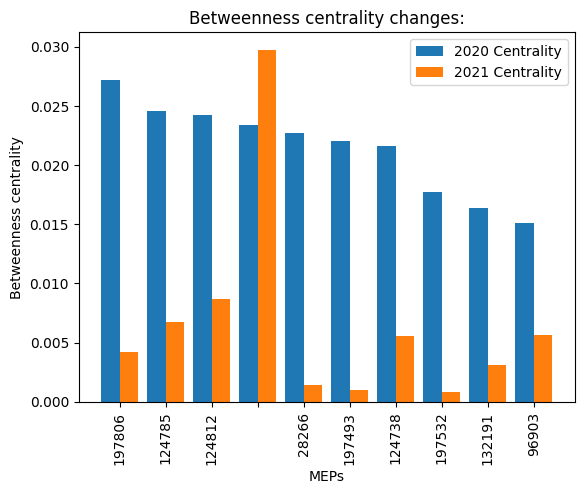

In [31]:
X_axis = np.arange(len(x))

plt.bar(X_axis - 0.2, y1, 0.4, label = '2020 Centrality')
plt.bar(X_axis + 0.2, y2, 0.4, label = '2021 Centrality')
  
plt.xticks(X_axis, x, rotation = 90)
plt.xlabel("MEPs")
plt.ylabel("Betweenness centrality")
plt.title("Betweenness centrality changes:")
plt.legend()
plt.show()

Basically the above graph represents the betweenness centrality changes for the top 10 EMPs (according to measurements from 2020)

Let us also look at Eigenvector Centrality but now let us observe the centrality measures in 2020, for the top 10 most influential MEPs (according to 2021 measurements). That is who the benificiaries of the changes were from 2020 to 2021.

In [35]:
x = [Eig_Cent_2021[i][0] for i in range(len(Eig_Cent_2021[:10]))] # top 10 MEP according to eigenvector centrality in 2021
y2 = [Eig_Cent_2021_UnSort[x[i]] for i in range(len(x)) ]         #eigenvector centrality values top 10 MEP in 2021
y1=[]                                                             #eigenvector centrality values top 10 MEP in 2020
for i in range(len(x)):
    try: 
        y1.append(Eig_Cent_2020_UnSort[x[i]])
    except: 
        y1.append(0)
          

print(Eig_Cent_2021[:10])
print(x)
print(y1)
print(y2)

[('130100', 0.14858573701749217), ('197567', 0.1392665190249663), ('197463', 0.13083224892664938), ('202073', 0.13044955737238353), ('197523', 0.1296341678266221), ('103746', 0.12412865421228003), ('197869', 0.12349891163756983), ('134605', 0.1196878023456399), ('', 0.10857996764910478), ('209091', 0.10802263633633685)]
['130100', '197567', '197463', '202073', '197523', '103746', '197869', '134605', '', '209091']
[0.12842530091982832, 0.09931017676123369, 0.10006083952973675, 0.09293407125797892, 0.0729441666992619, 0.08813788434324722, 0.08174617803466834, 0.08166004537342293, 0.0833743509462057, 0]
[0.14858573701749217, 0.1392665190249663, 0.13083224892664938, 0.13044955737238353, 0.1296341678266221, 0.12412865421228003, 0.12349891163756983, 0.1196878023456399, 0.10857996764910478, 0.10802263633633685]


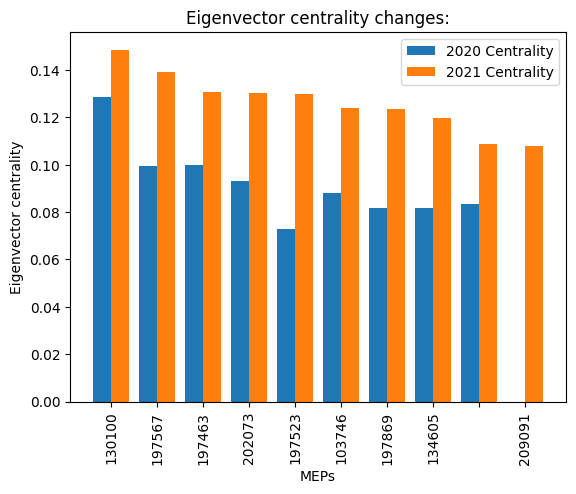

In [36]:
X_axis = np.arange(len(x))

plt.bar(X_axis - 0.2, y1, 0.4, label = '2020 Centrality')
plt.bar(X_axis + 0.2, y2, 0.4, label = '2021 Centrality')
  
plt.xticks(X_axis, x, rotation = 90)
plt.xlabel("MEPs")
plt.ylabel("Eigenvector centrality")
plt.title("Eigenvector centrality changes:")
plt.legend()
plt.show()